In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
from sklearn.preprocessing import normalize

from sklearn.metrics.pairwise import cosine_similarity, euclidean_distances
from sklearn.decomposition import PCA
import json

In [2]:
# Data Loading
photos_df = pd.read_csv('C:/Users/lmir/Desktop/Tese/Results_sim/emorecsys_data/CSVs_8_7_2024/csvs_survey/photos.csv', sep=',', encoding='latin-1',low_memory=False)
ratings_df = pd.read_csv('C:/Users/lmir/Desktop/Tese/Results_sim/emorecsys_data/CSVs_8_7_2024/csvs_survey/ratings.csv', sep=',', encoding='latin-1',low_memory=False)
surveys_df = pd.read_csv('C:/Users/lmir/Desktop/Tese/Results_sim/emorecsys_data/CSVs_8_7_2024/csvs_survey/surveys.csv', sep=',', encoding='latin-1',low_memory=False)
annotations_df = pd.read_csv('C:/Users/lmir/Desktop/Tese/Results_sim/emorecsys_data/CSVs_8_7_2024/csvs_survey/annotations.csv', sep=',', encoding='latin-1',low_memory=False)

In [3]:
#Go fetch the train and test
testset = pd.read_csv('C:/Users/lmir/Desktop/Tese/EmoRecSys/data/csvs/testset_emotions.csv')
trainset = pd.read_csv('C:/Users/lmir/Desktop/Tese/EmoRecSys/data/csvs/trainset_emotions.csv')

# Converter de volta para lista de tuplas
testset = [tuple(row) for row in testset.to_numpy()]
trainset = [tuple(row) for row in trainset.to_numpy()]

# Exibir os dados carregados
print(testset)
print(trainset)

[(1, 1738, 1), (1, 889, 0), (1, 2315, 0), (2, 1872, 1), (2, 1898, 0), (2, 2121, 1), (3, 2144, 1), (3, 316, 0), (3, 1927, 0), (4, 2323, 1), (4, 1250, 0), (4, 1665, 1), (5, 1686, 1), (5, 2347, 1), (5, 1717, 1), (6, 1308, 1), (6, 698, 1), (6, 546, 1), (7, 2789, 1), (7, 2877, 0), (7, 1751, 0), (8, 2313, 1), (8, 2560, 0), (8, 1078, 1), (9, 2668, 1), (9, 2780, 0), (9, 1247, 1), (10, 2372, 1), (10, 380, 0), (10, 155, 0), (11, 1255, 1), (11, 1802, 0), (11, 1681, 1), (12, 2989, 1), (12, 2876, 0), (12, 1838, 1), (13, 2787, 1), (13, 1280, 0), (13, 2684, 0), (14, 1091, 1), (14, 857, 0), (14, 2137, 1), (15, 2848, 1), (15, 1726, 0), (15, 346, 0), (16, 1395, 1), (16, 2259, 0), (16, 205, 1), (17, 3041, 1), (17, 2811, 0), (17, 257, 1), (18, 1202, 1), (18, 954, 0), (18, 1594, 1), (19, 2832, 1), (19, 1535, 1), (19, 1891, 1), (20, 6, 1), (20, 2546, 0), (20, 567, 1), (21, 137, 1), (21, 887, 0), (21, 739, 1), (22, 1273, 1), (22, 2674, 0), (22, 2369, 1), (23, 39, 1), (23, 534, 0), (23, 1638, 1), (24, 2559, 1

In [4]:
import pandas as pd

df_embeddings_vgg16 = pd.read_csv('C:/Users/lmir/Desktop/Tese/Results_sim/emorecsys_data/CSVs_8_7_2024/embeddings_vgg16.csv')
df_embeddings_vgg19 = pd.read_csv('C:/Users/lmir/Desktop/Tese/Results_sim/emorecsys_data/CSVs_8_7_2024/embeddings_vgg19.csv')

In [5]:
df_embeddings_resnet50 = pd.read_json('C:/Users/lmir/Desktop/Tese/EmoRecSys/data/jsons/df_embeddings_resnet50.json', orient='records', lines=True)
df_embeddings_resnet50v2 = pd.read_json('C:/Users/lmir/Desktop/Tese/EmoRecSys/data/jsons/df_embeddings_resnet50v2.json', orient='records', lines=True)
df_embeddings_resnet101 = pd.read_json('C:/Users/lmir/Desktop/Tese/EmoRecSys/data/jsons/df_embeddings_resnet101.json', orient='records', lines=True)
df_embeddings_resnet101v2 = pd.read_json('C:/Users/lmir/Desktop/Tese/EmoRecSys/data/jsons/df_embeddings_resnet101v2.json', orient='records', lines=True)
df_embeddings_resnet152 = pd.read_json('C:/Users/lmir/Desktop/Tese/EmoRecSys/data/jsons/df_embeddings_resnet152.json', orient='records', lines=True)
df_embeddings_resnet152v2 = pd.read_json('C:/Users/lmir/Desktop/Tese/EmoRecSys/data/jsons/df_embeddings_resnet152v2.json', orient='records', lines=True)
df_embeddings_inceptionv3 = pd.read_json('C:/Users/lmir/Desktop/Tese/EmoRecSys/data/jsons/df_embeddings_incepitonv3.json', orient='records', lines=True)
df_embeddings_xception = pd.read_json('C:/Users/lmir/Desktop/Tese/EmoRecSys/data/jsons/df_embeddings_xception.json', orient='records', lines=True)

In [6]:
df_random_items_per_user = pd.read_json('C:/Users/lmir/Desktop/Tese/EmoRecSys/data/jsons/random_items_per_user_emotions.json')
df_random_items_per_user

,1,2,3,4,5,6,7,8,9,10,...,154,155,156,157,158,159,160,161,162,163
0,1078,2319,1417,1317,3054,1881,2745,2444,1246,1980,...,1600,2288,2789,2727,128,1127,2098,1891,1853,316
1,2618,1525,674,1127,257,2621,1979,560,177,113,...,340,2098,40,1778,612,2074,567,3047,3037,2369
2,2839,1236,2583,1872,1235,2516,857,429,1980,880,...,991,2559,60,1737,2844,1521,2789,1567,257,2594
3,1415,1848,55,599,1087,429,2780,1940,1078,1966,...,3041,1725,1892,2143,1858,2137,1059,2922,1642,2341
4,227,2799,2405,2191,1771,1816,2995,2366,1100,3004,...,1979,2940,1665,748,2839,2673,2457,1055,1771,2358
5,319,857,1940,1747,925,1628,1341,655,530,137,...,1194,2482,1202,364,1548,559,2192,534,2306,1287
6,193,2192,148,1730,2896,383,2755,46,1038,400,...,2937,2286,3004,1785,1725,3018,2632,2193,2745,2892
7,2352,1142,1871,2738,2053,319,2674,2114,137,2521,...,2677,2751,461,2366,1395,464,1720,1339,1801,415
8,1165,2435,2868,1645,681,692,2799,2673,1302,1342,...,1681,1007,98,354,1778,128,1980,2285,731,1362
9,421,1881,1818,2202,2985,2536,142,1721,2678,2811,...,542,3032,1194,2237,2367,2406,99,3018,1513,2287


In [7]:
json_path = 'C:/Users/lmir/Desktop/Tese/EmoRecSys/data/jsons/random_items_per_user_emotions.json'
with open(json_path, 'r') as file:
    random_items_dict = json.load(file)

random_items_dict = {int(key): value for key, value in random_items_dict.items()}
random_items_dict

{1: [1078,
  2618,
  2839,
  1415,
  227,
  319,
  193,
  2352,
  1165,
  421,
  2702,
  2674,
  2367,
  2848,
  2303,
  530,
  2810,
  383,
  1424,
  1725],
 2: [2319,
  1525,
  1236,
  1848,
  2799,
  857,
  2192,
  1142,
  2435,
  1881,
  953,
  426,
  1428,
  1738,
  498,
  2476,
  2989,
  584,
  2895,
  346],
 3: [1417,
  674,
  2583,
  55,
  2405,
  1940,
  148,
  1871,
  2868,
  1818,
  2234,
  1237,
  340,
  2344,
  2137,
  1247,
  546,
  1521,
  1612,
  1045],
 4: [1317,
  1127,
  1872,
  599,
  2191,
  1747,
  1730,
  2738,
  1645,
  2202,
  3042,
  1080,
  3059,
  38,
  3015,
  1247,
  1792,
  732,
  2740,
  2848],
 5: [3054,
  257,
  1235,
  1087,
  1771,
  925,
  2896,
  2053,
  681,
  2985,
  128,
  1747,
  889,
  2259,
  2195,
  2089,
  316,
  347,
  1543,
  2369],
 6: [1881,
  2621,
  2516,
  429,
  1816,
  1628,
  383,
  319,
  692,
  2536,
  1771,
  969,
  2702,
  2736,
  2745,
  1246,
  1352,
  1554,
  1429,
  1763],
 7: [2745,
  1979,
  857,
  2780,
  2995,
  1341,


In [8]:
df_embeddings_resnet50

,embedding,id
0,"[[10.9118013382, 0.0, 1.9094718695, 1.39259040...",492
1,"[[2.4981195927, 2.0137376785, 0.20146203040000...",496
2,"[[4.3851785660000004, 1.5552761555, 0.0, 3.049...",1
3,"[[3.6507296562000002, 5.4972262383, 1.54726612...",2
4,"[[0.15464317800000002, 7.8296756744, 0.5404337...",3
...,...,...
2880,"[[3.8913712502, 1.7102018595000001, 3.63007307...",751
2881,"[[8.2360239029, 0.8491530418000001, 0.0, 0.696...",1070
2882,"[[4.3323030472, 7.6791653633, 1.88946342470000...",2877
2883,"[[1.1231784821, 2.4954776764, 0.4713532925, 2....",2878


In [9]:
embeddings_list_restnet50 = df_embeddings_resnet50['embedding'].tolist()
embeddings_list_restnet50v2 = df_embeddings_resnet50v2['embedding'].tolist()
embeddings_list_restnet101 = df_embeddings_resnet101['embedding'].tolist()
embeddings_list_restnet101v2 = df_embeddings_resnet101v2['embedding'].tolist()
embeddings_list_restnet152 = df_embeddings_resnet152['embedding'].tolist()
embeddings_list_restnet152v2 = df_embeddings_resnet152v2['embedding'].tolist()
embeddings_list_inceptionv3 = df_embeddings_inceptionv3['embedding'].tolist()
embeddings_list_xception = df_embeddings_xception['embedding'].tolist()

# Crie um DataFrame onde cada vetor de embedding é uma lista em uma única coluna
df_embeddings_resnet50_1 = pd.DataFrame({'embedding': embeddings_list_restnet50})
df_embeddings_resnet50v2_1 = pd.DataFrame({'embedding': embeddings_list_restnet50v2})
df_embeddings_resnet101_1 = pd.DataFrame({'embedding': embeddings_list_restnet101})
df_embeddings_resnet101v2_1 = pd.DataFrame({'embedding': embeddings_list_restnet101v2})
df_embeddings_resnet152_1 = pd.DataFrame({'embedding': embeddings_list_restnet152})
df_embeddings_resnet152v2_1 = pd.DataFrame({'embedding': embeddings_list_restnet152v2})
df_embeddings_inceptionv3_1 = pd.DataFrame({'embedding': embeddings_list_inceptionv3})
df_embeddings_xception_1 = pd.DataFrame({'embedding': embeddings_list_xception})

df_embeddings_resnet50_1['id'] = df_embeddings_resnet50['id'].values
df_embeddings_resnet50v2_1['id'] = df_embeddings_resnet50v2['id'].values
df_embeddings_resnet101_1['id'] = df_embeddings_resnet101['id'].values
df_embeddings_resnet101v2_1['id'] = df_embeddings_resnet101v2['id'].values
df_embeddings_resnet152_1['id'] = df_embeddings_resnet152['id'].values
df_embeddings_resnet152v2_1['id'] = df_embeddings_resnet152v2['id'].values
df_embeddings_inceptionv3_1['id'] = df_embeddings_inceptionv3['id'].values
df_embeddings_xception_1['id'] = df_embeddings_xception['id'].values

# Verifique o resultado
print(df_embeddings_resnet50_1.shape)  # Mostra a forma do DataFrame
print(df_embeddings_resnet50_1.head())  # Mostra as primeiras linhas do DataFrame
print(df_embeddings_resnet50v2_1.shape)  # Mostra a forma do DataFrame
print(df_embeddings_resnet50v2_1.head())  # Mostra as primeiras linhas do DataFrame
print(df_embeddings_resnet101_1.shape)  # Mostra a forma do DataFrame
print(df_embeddings_resnet101_1.head())  # Mostra as primeiras linhas do DataFrame
print(df_embeddings_resnet101v2_1.shape)  # Mostra a forma do DataFrame
print(df_embeddings_resnet101v2_1.head())  # Mostra as primeiras linhas do DataFrame
print(df_embeddings_resnet152_1.shape)  # Mostra a forma do DataFrame
print(df_embeddings_resnet152_1.head())  # Mostra as primeiras linhas do DataFrame
print(df_embeddings_resnet152v2_1.shape)  # Mostra a forma do DataFrame
print(df_embeddings_resnet152v2_1.head())  # Mostra as primeiras linhas do DataFrame
print(df_embeddings_inceptionv3_1.shape)  # Mostra a forma do DataFrame
print(df_embeddings_inceptionv3_1.head())  # Mostra as primeiras linhas do DataFrame
print(df_embeddings_xception_1.shape)  # Mostra a forma do DataFrame
print(df_embeddings_xception_1.head())  # Mostra as primeiras linhas do DataFrame

type(df_embeddings_resnet50_1['embedding'][0])
type(df_embeddings_resnet50v2_1['embedding'][0])
type(df_embeddings_resnet101_1['embedding'][0])
type(df_embeddings_resnet101v2_1['embedding'][0])
type(df_embeddings_resnet152_1['embedding'][0])
type(df_embeddings_resnet152v2_1['embedding'][0])
type(df_embeddings_inceptionv3_1['embedding'][0])
type(df_embeddings_xception_1['embedding'][0])


(2885, 2)
                                           embedding   id
0  [[10.9118013382, 0.0, 1.9094718695, 1.39259040...  492
1  [[2.4981195927, 2.0137376785, 0.20146203040000...  496
2  [[4.3851785660000004, 1.5552761555, 0.0, 3.049...    1
3  [[3.6507296562000002, 5.4972262383, 1.54726612...    2
4  [[0.15464317800000002, 7.8296756744, 0.5404337...    3
(2885, 2)
                                           embedding   id
0  [[1061.9611816406, 207.871307373, 0.0, 2043.14...  492
1  [[1632.5900878906, 394.9436950684, 0.0, 1757.9...  496
2  [[2475.3249511719, 614.6550292969, 0.0, 3198.8...    1
3  [[2029.1242675781, 774.8176879883, 302.2265319...    2
4  [[1811.0581054688, 412.5929260254, 0.0, 1821.1...    3
(2885, 2)
                                           embedding   id
0  [[2.1904501915, 7.6403608322, 0.0, 0.0, 2.6334...  492
1  [[7.1585330963, 16.8141117096, 1.5135257244, 1...  496
2  [[9.9981355667, 1.6079053879, 24.355342865, 3....    1
3  [[21.0956306458, 16.9489269257, 26.1120

list

In [10]:
def convert_to_numpy_array(input_str):
    input_str_cleaned = input_str.strip('[]')
    input_list = [list(map(float, sublist.split())) for sublist in input_str_cleaned.split('],[')]
    return np.array(input_list)

df_embeddings_vgg16['embedding'] = df_embeddings_vgg16['embedding'].apply(convert_to_numpy_array)
df_embeddings_vgg19['embedding'] = df_embeddings_vgg19['embedding'].apply(convert_to_numpy_array)

df_embeddings_vgg16

,embedding,id
0,"[[0.0, 25.1039314, 34.5760384, 0.0, 13.1063433...",492
1,"[[0.0, 14.761104, 2.9091244, 8.950207, 29.5257...",496
2,"[[82.287178, 26.5189075, 89.4835129, 11.791474...",1
3,"[[25.3831501, 0.0, 87.222023, 0.0, 28.6426258,...",2
4,"[[0.359096527, 14.3963013, 78.7917786, 4.52763...",3
...,...,...
2880,"[[105.828186, 0.0, 0.0, 0.0, 20.551533, 83.391...",751
2881,"[[145.572113, 0.0, 0.0, 0.0, 0.0, 21.031517, 3...",1070
2882,"[[51.1543999, 94.6103439, 77.2410889, 110.5913...",2877
2883,"[[33.5848999, 76.9306488, 31.350935, 22.185155...",2878


In [11]:
len(df_embeddings_vgg16['embedding'][0][0])

512

In [12]:
embedding_matrix_vgg16 = np.vstack(df_embeddings_vgg16['embedding'].apply(lambda x: np.array(x).flatten()))
embedding_matrix_vgg16

array([[ 0.        , 25.1039314 , 34.5760384 , ...,  3.59151506,
         8.98261547, 14.2023478 ],
       [ 0.        , 14.761104  ,  2.9091244 , ...,  2.2438133 ,
        18.997791  ,  0.        ],
       [82.287178  , 26.5189075 , 89.4835129 , ..., 28.0004044 ,
        37.711483  , 33.6548805 ],
       ...,
       [51.1543999 , 94.6103439 , 77.2410889 , ..., 13.0951099 ,
        22.2879791 , 36.8871346 ],
       [33.5848999 , 76.9306488 , 31.350935  , ..., 24.4272232 ,
        24.5896015 , 25.6951828 ],
       [25.995039  ,  0.        , 36.0063629 , ..., 55.1245384 ,
         4.94234943, 50.0449066 ]])

In [13]:
def evaluate_metrics(recommendations, testset, ks):
    """
    Calculates precision, recall, and F1-score for different values of k, based on the recommendations and the test set.

    Args:
        recommendations (dict): A dictionary where keys are user IDs and values are lists of recommended item IDs.
        testset (Dataset): The test dataset containing user-item interactions with ratings.
        ks (list): A list of integer values for k, representing the number of top recommendations to evaluate.

    Returns:
        tuple: Three dictionaries (precisions, recalls, f1_scores) where each key is a value of k and the values are dictionaries mapping user IDs to their respective precision, recall, and F1-score for that k.
    """

    relevant_items_dict = {}
    test_df = pd.DataFrame(testset, columns=['uid', 'iid', 'rating'])
    for user in test_df['uid'].unique():
        user_test_df = test_df[test_df['uid'] == user]
        relevant_items = set(user_test_df[user_test_df['rating'] > 0]['iid'])
        relevant_items_dict[user] = relevant_items

    precisions = {k: {} for k in ks}
    recalls = {k: {} for k in ks}
    f1_scores = {k: {} for k in ks}

    for user, relevant_items in relevant_items_dict.items():
        relevant_set = set(relevant_items)
        # print('relevant_set')
        # print(relevant_set)
        for k in ks:
            top_k_recommendations = set(recommendations[user][:k])
            relevant_and_recommended = top_k_recommendations & relevant_set #Interseption between the recommended and relevant
            # print('relevant_and_recommended')
            # print(relevant_and_recommended)
            rel_rec = len(relevant_and_recommended)
            precision = rel_rec / k if k > 0 else 0.0
            recall = rel_rec / len(relevant_set) if relevant_set else 0.0
            f1score = (2 * precision * recall) / (precision + recall) if (precision + recall) > 0 else 0.0

            precisions[k][user] = precision
            recalls[k][user] = recall
            f1_scores[k][user] = f1score

    return precisions, recalls, f1_scores

def evaluate_metrics_avg(precisions, recalls, f1scores):
    """Calculates the average precision, recall, an f1-score for different values of k,
    based on the precision, recall, and f1-score metrics calculated for each user

    Args:
        precisions (dict): keys are the values of k and the values are dicts where the keys are the user ids
        and their precision score
        recalls (dict): keys are the values of k and the values are dicts where the keys are the user ids
        and their recall score
        f1scores (dict): keys are the values of k and the values are dicts where the keys are the user ids
        and their f1-score score

    Returns:
        tuple: containing three dicts:
        
        -avg_precisions: average precision score for the values of k, the keys are the values of k
        and the values are the corresponding average precision scores
        -avg_recalls: average precision score for the values of k, the keys are the values of k
        and the values are the corresponding average recall scores
        -avg_f1-scores: average precision score for the values of k, the keys are the values of k
        and the values are the corresponding average f1-scores
    """

    avg_precisions = {k: round(sum(precisions[k].values()) / len(precisions[k]), 4) for k in precisions}
    avg_recalls = {k: round(sum(recalls[k].values()) / len(recalls[k]), 4) for k in recalls}
    avg_f1scores = {k: round(sum(f1scores[k].values()) / len(f1scores[k]), 4) for k in f1scores}

    # print(avg_precisions)
    return avg_precisions, avg_recalls, avg_f1scores

In [14]:
def compute_cosine_similarity_matrix_by_user(df_embeddings):
    """Computes a cosine similarity matrix for user embeddings

    Args:
        df_embeddings (pd.DataFrame): DataFrame containing embeddings and associated IDs for each user. Ut has an 'embedding' column with list or array-like vectors
        and an 'id' column with unique identifiers for each embedding.

    Returns:
        similarity_df: DataFrame representing the cosine similarity matrix between all user embeddings.Rows and columns are labeled by user 'id' values from the input DataFrame.
    """

    pixels_vec = np.array(df_embeddings['embedding'].tolist())

    # print(pixels_vec.shape)
    pixels_vec = np.squeeze(pixels_vec)
    # print(pixels_vec.shape)
    similarity_matrix = cosine_similarity(pixels_vec)
    # print(pixels_vec)

    similarity_df = pd.DataFrame(similarity_matrix, index=df_embeddings['id'], columns=df_embeddings['id'])

    if similarity_df.columns.is_unique == False:
        print('PROBLEM COLUMNS')

    if similarity_df.index.is_unique == False:
        print('PROBLEM INDEXS')

    assert similarity_df.columns.is_unique, f"Duplicated columns in similarity_df: {similarity_df.columns[similarity_df.columns.duplicated()]}"
    assert similarity_df.index.is_unique, f"Duplicated indices in similarity_df: {similarity_df.index[similarity_df.index.duplicated()]}"

        
    return similarity_df

In [15]:
a = compute_cosine_similarity_matrix_by_user(df_embeddings_vgg16)

In [16]:
a

id,492,496,1,2,3,4,5,6,7,8,...,1151,711,2897,2360,1939,751,1070,2877,2878,1341
id,,,,,,,,,,,,,,,,,,,,,
492,1.000000,0.498013,0.406862,0.363559,0.303057,0.376467,0.347564,0.388864,0.408412,0.340896,...,0.287133,0.433998,0.351992,0.601505,0.430989,0.389244,0.313273,0.451081,0.385523,0.301909
496,0.498013,1.000000,0.461658,0.433447,0.364637,0.466885,0.352258,0.420930,0.437025,0.371510,...,0.306143,0.372052,0.455501,0.577973,0.469621,0.375678,0.305222,0.414945,0.362685,0.398179
1,0.406862,0.461658,1.000000,0.659486,0.478819,0.694218,0.645584,0.658460,0.639628,0.625527,...,0.327062,0.489071,0.537124,0.398283,0.359304,0.519709,0.401024,0.607757,0.559786,0.530586
2,0.363559,0.433447,0.659486,1.000000,0.458441,0.596733,0.481069,0.687373,0.494706,0.507457,...,0.317918,0.469082,0.400114,0.392817,0.309522,0.533766,0.371043,0.548044,0.532736,0.510222
3,0.303057,0.364637,0.478819,0.458441,1.000000,0.520333,0.518052,0.443778,0.447199,0.642474,...,0.279968,0.389502,0.336761,0.341152,0.278480,0.474771,0.270858,0.569903,0.512263,0.406996
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,0.389244,0.375678,0.519709,0.533766,0.474771,0.590336,0.461800,0.533300,0.476024,0.510365,...,0.443426,0.592250,0.455510,0.406804,0.347592,1.000000,0.376117,0.552138,0.622689,0.571749
1070,0.313273,0.305222,0.401024,0.371043,0.270858,0.340936,0.325509,0.377636,0.391565,0.297300,...,0.213091,0.352893,0.315315,0.322936,0.241444,0.376117,1.000000,0.366807,0.319491,0.280266
2877,0.451081,0.414945,0.607757,0.548044,0.569903,0.635907,0.524107,0.522312,0.620628,0.634761,...,0.383665,0.472849,0.500283,0.437783,0.340053,0.552138,0.366807,1.000000,0.682532,0.536052


In [17]:
b = compute_cosine_similarity_matrix_by_user(df_embeddings_resnet152_1)

In [18]:
b

id,492,496,1,2,3,4,5,6,7,8,...,1151,711,2897,2360,1939,751,1070,2877,2878,1341
id,,,,,,,,,,,,,,,,,,,,,
492,1.000000,0.547544,0.460252,0.396837,0.325380,0.402289,0.413747,0.478666,0.417276,0.380609,...,0.439166,0.527665,0.438392,0.539589,0.529114,0.431582,0.471366,0.442704,0.423023,0.380282
496,0.547544,1.000000,0.426286,0.408614,0.346220,0.436873,0.379421,0.379216,0.362677,0.381618,...,0.475179,0.435879,0.419232,0.579864,0.508813,0.398057,0.360971,0.413149,0.367121,0.417772
1,0.460252,0.426286,1.000000,0.665604,0.519450,0.675833,0.626839,0.591806,0.645631,0.602943,...,0.445728,0.490310,0.553791,0.420740,0.472936,0.555874,0.477408,0.584300,0.554074,0.504405
2,0.396837,0.408614,0.665604,1.000000,0.538281,0.632996,0.558523,0.610591,0.579958,0.545395,...,0.411501,0.477413,0.462928,0.396001,0.415479,0.553449,0.430925,0.538413,0.556757,0.509550
3,0.325380,0.346220,0.519450,0.538281,1.000000,0.567810,0.560415,0.456227,0.483141,0.638719,...,0.366177,0.401401,0.379619,0.359180,0.376603,0.506112,0.424535,0.547942,0.499827,0.425350
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,0.431582,0.398057,0.555874,0.553449,0.506112,0.551704,0.579006,0.485976,0.539822,0.614365,...,0.532459,0.622431,0.527543,0.423660,0.493932,1.000000,0.444688,0.574274,0.598730,0.580338
1070,0.471366,0.360971,0.477408,0.430925,0.424535,0.468608,0.471347,0.523812,0.515096,0.430651,...,0.413368,0.445906,0.408917,0.402755,0.406001,0.444688,1.000000,0.461886,0.426216,0.426900
2877,0.442704,0.413149,0.584300,0.538413,0.547942,0.610845,0.510615,0.526351,0.565867,0.597163,...,0.519880,0.524708,0.516728,0.499569,0.492379,0.574274,0.461886,1.000000,0.700501,0.516841


In [19]:
def similar_items(item_to_recommend, user_profile_items, similarity_matrix_df, n=5):
    train_items_scores = similarity_matrix_df.loc[item_to_recommend, similarity_matrix_df.columns.isin(user_profile_items)]

    tuples_ids_score = list(zip(train_items_scores.index, train_items_scores.values))
    tuples_ids_score.sort(key=lambda x: x[1], reverse=True)
    item_ids = [item for item, _ in tuples_ids_score]
    # return item_ids[:n]
    return tuples_ids_score[:n] ,item_ids[:n]

In [20]:
def compute_cosine_similarity_matrix_by_user(df_embeddings):
    """Computes a cosine similarity matrix for user embeddings

    Args:
        df_embeddings (pd.DataFrame): DataFrame containing embeddings and associated IDs for each user. Ut has an 'embedding' column with list or array-like vectors
        and an 'id' column with unique identifiers for each embedding.

    Returns:
        similarity_df: DataFrame representing the cosine similarity matrix between all user embeddings.Rows and columns are labeled by user 'id' values from the input DataFrame.
    """

    pixels_vec = np.array(df_embeddings['embedding'].tolist())

    # print(pixels_vec.shape)
    pixels_vec = np.squeeze(pixels_vec)
    # print(pixels_vec.shape)
    similarity_matrix = cosine_similarity(pixels_vec)
    # print(pixels_vec)

    similarity_df = pd.DataFrame(similarity_matrix, index=df_embeddings['id'], columns=df_embeddings['id'])

    if similarity_df.columns.is_unique == False:
        print('PROBLEM COLUMNS')

    if similarity_df.index.is_unique == False:
        print('PROBLEM INDEXS')

    assert similarity_df.columns.is_unique, f"Duplicated columns in similarity_df: {similarity_df.columns[similarity_df.columns.duplicated()]}"
    assert similarity_df.index.is_unique, f"Duplicated indices in similarity_df: {similarity_df.index[similarity_df.index.duplicated()]}"

        
    return similarity_df

In [21]:
def recommend_items_by_user_cos(trainset, testset, df_embeddings, n, metric, random_items_dict):
    """Generates item recommendations for users based on cosine similarity between item embeddings.

    Args:
        trainset (list of tuples): List of training interactions in the format (user_id, item_id, rating).
        testset (list of tuples): List of test interactions in the format (user_id, item_id, rating).
        df_embeddings (pd.Dataframe): DataFrame containing embeddings and associated IDs for items. Must have an 'embedding' column 
        with list or array-like vectors and an 'id' column with unique identifiers for each item.
        n (int): The number of similar items to consider when computing recommendations for each item.

    Returns:
        dict: Dictionary with user IDs as keys and lists of recommended item IDs as values.
        Each list contains the top 10 recommended items for the corresponding user, sorted by predicted relevance.
    """

    train_df = pd.DataFrame(trainset, columns=['uid', 'iid', 'rating'])
    test_df = pd.DataFrame(testset, columns=['uid', 'iid', 'rating'])

    items_all_ids = set(train_df['iid'].to_list() + test_df['iid'].to_list())

    similarity_df = compute_cosine_similarity_matrix_by_user(df_embeddings)

    recommendations = {}

    for user in test_df['uid'].unique():

        user_train = train_df[train_df['uid'] == user]
        user_test = test_df[test_df['uid'] == user]

        train_item_ids = user_train['iid'].to_list()
        test_item_ids = user_test['iid'].to_list()

        items_to_recommend = []

        # available_items = list(items_all_ids - set(train_item_ids) - set(test_item_ids)) # todos os items menos os do 
        # random_items = random.sample(available_items, 20)
        random_items = random_items_dict[user]
        # Metric 1 - médria dos ratings
        if metric == 1:
            for item in random_items:
                item_sim_tuple, item_train_id = similar_items(item, train_item_ids, similarity_df, n)
                item_sim_df = user_train[user_train['iid'].isin(item_train_id)]
                desempate = 0
                for i in range(len(item_sim_tuple)):
                    ab = item_sim_df[item_sim_df['iid']==item_sim_tuple[i][0]]['rating'].values[0]
                    if ab == 1:
                        desempate = item_sim_tuple[i][1]
                        break
                ratings = item_sim_df['rating'].tolist()
                mean_value_ratings = np.mean(ratings)  # if ratings else 0
                items_to_recommend.append((item, mean_value_ratings, desempate))

            for test_item in test_item_ids:
                item_sim_tuple, item_train_id = similar_items(test_item, train_item_ids, similarity_df, n)
                item_sim_df = user_train[user_train['iid'].isin(item_train_id)]
                sum_user = 0
                for iid , sim_score in item_sim_tuple:
                    # print(iid)
                    rating = item_sim_df.loc[item_sim_df['iid'] == iid, 'rating'].values[0]
                    sum_user = sum_user + (sim_score * rating)
                desempate = 0
                for i in range(len(item_sim_tuple)):
                    ab = item_sim_df[item_sim_df['iid']==item_sim_tuple[i][0]]['rating'].values[0]
                    if ab == 1:
                        desempate = item_sim_tuple[i][1]
                        break
                ratings = item_sim_df['rating'].tolist()
                mean_value_ratings = np.mean(ratings) if ratings else 0
                items_to_recommend.append((test_item, mean_value_ratings, desempate))

        # Metric 2
        if metric == 2:
            for item in random_items:
                item_random_sim , item_random_sim_id = similar_items(item, train_item_ids, similarity_df, n)
                item_random_sim_df = user_train[user_train['iid'].isin(item_random_sim_id)]
                desempate = 0
                for i in range(len(item_random_sim)):
                    ab = item_random_sim_df[item_random_sim_df['iid']==item_random_sim[i][0]]['rating'].values[0]
                    if ab == 1:
                        desempate = item_random_sim[i][1]
                        break
                sum_user = 0
                sum_sim = 0
                for iid , sim_score in item_random_sim:
                    # print(iid)
                    rating = item_random_sim_df.loc[item_random_sim_df['iid'] == iid, 'rating'].values[0]
                    sum_user = sum_user + (sim_score * rating)
                    sum_sim = sum_sim + sim_score
                item_value = sum_user/sum_sim
                items_to_recommend.append((item, item_value, desempate))

            for item_test in test_item_ids:
                item_random_sim , item_random_sim_id = similar_items(item_test, train_item_ids, similarity_df, n)
                item_random_sim_df = user_train[user_train['iid'].isin(item_random_sim_id)]
                desempate = 0
                for i in range(len(item_random_sim)):
                    ab = item_random_sim_df[item_random_sim_df['iid']==item_random_sim[i][0]]['rating'].values[0]
                    if ab == 1:
                        desempate = item_random_sim[i][1]
                        break
                sum_user = 0
                sum_sim = 0
                for iid , sim_score in item_random_sim:
                    # print(iid)
                    rating = item_random_sim_df.loc[item_random_sim_df['iid'] == iid, 'rating'].values[0]
                    sum_user = sum_user + (sim_score * rating)
                    sum_sim = sum_sim + sim_score
                item_value = sum_user/sum_sim
                items_to_recommend.append((item_test, item_value, desempate))

        # Metric 3
        if metric == 3:
            for item in random_items:
                item_random_sim , item_random_sim_id = similar_items(item, train_item_ids, similarity_df, n)
                item_random_sim_df = user_train[user_train['iid'].isin(item_random_sim_id)]
                desempate = 0
                for i in range(len(item_random_sim)):
                    ab = item_random_sim_df[item_random_sim_df['iid']==item_random_sim[i][0]]['rating'].values[0]
                    if ab == 1:
                        desempate = item_random_sim[i][1]
                        break
                sum_user = 0
                sum_sim = 0
                for iid , sim_score in item_random_sim:
                    # print(iid)
                    rating = item_random_sim_df.loc[item_random_sim_df['iid'] == iid, 'rating'].values[0]
                    sum_user = sum_user + (sim_score**2 * rating)
                    sum_sim = sum_sim + (sim_score**2)
                item_value = sum_user/sum_sim
                items_to_recommend.append((item, item_value,desempate))

            for item_test in test_item_ids:
                item_random_sim , item_random_sim_id = similar_items(item_test, train_item_ids, similarity_df, n)
                item_random_sim_df = user_train[user_train['iid'].isin(item_random_sim_id)]
                desempate = 0
                for i in range(len(item_random_sim)):
                    ab = item_random_sim_df[item_random_sim_df['iid']==item_random_sim[i][0]]['rating'].values[0]
                    if ab == 1:
                        desempate = item_random_sim[i][1]
                        break
                sum_user = 0
                sum_sim = 0
                for iid , sim_score in item_random_sim:
                    # print(iid)
                    rating = item_random_sim_df.loc[item_random_sim_df['iid'] == iid, 'rating'].values[0]
                    sum_user = sum_user + (sim_score**2 * rating)
                    sum_sim = sum_sim + sim_score**2
                item_value = sum_user/sum_sim
                items_to_recommend.append((item_test, item_value,desempate))

            
        # print(items_to_recommend)
        items_to_recommend = sorted(items_to_recommend, key=lambda x: (x[1], x[2]), reverse=True)  
        # print(items_to_recommend)
        # items_to_recommend.sort(key=lambda x: x[1], reverse=True)
        # print(items_to_recommend[:10])
        items_to_recommend_ids = [item for item, _, _ in items_to_recommend]

        recommendations[user] = items_to_recommend_ids[:10]

    return recommendations

In [22]:
def compute_euclidean_similarity_matrix_by_user(df_embeddings):
    """Computes a euclidean similarity matrix for user embeddings

    Args:
        df_embeddings (pd.DataFrame): DataFrame containing embeddings and associated IDs for each user. Ut has an 'embedding' column with list or array-like vectors
        and an 'id' column with unique identifiers for each embedding.

    Returns:
        similarity_df: DataFrame representing the euclidean similarity matrix between all user embeddings.Rows and columns are labeled by user 'id' values from the input DataFrame.
    """

    pixels_vec = np.array(df_embeddings['embedding'].tolist())

    # print(pixels_vec.shape)
    pixels_vec = np.squeeze(pixels_vec)
    # print(pixels_vec.shape)

    pixels_vec_normalized = normalize(pixels_vec, norm='l2')

    similarity_matrix = euclidean_distances(pixels_vec_normalized)

    similarity_df = pd.DataFrame(similarity_matrix, index=df_embeddings['id'], columns=df_embeddings['id'])

    if similarity_df.columns.is_unique == False:
        print('PROBLEM COLUMNS')

    if similarity_df.index.is_unique == False:
        print('PROBLEM INDEXS')

    assert similarity_df.columns.is_unique, f"Duplicated columns in similarity_df: {similarity_df.columns[similarity_df.columns.duplicated()]}"
    assert similarity_df.index.is_unique, f"Duplicated indices in similarity_df: {similarity_df.index[similarity_df.index.duplicated()]}"

    return similarity_df

In [23]:
def recommend_items_by_user_eucl(trainset, testset, df_embeddings, n,metric, random_items_dict):
    """Generates item recommendations for users based on euclidean similarity between item embeddings.

    Args:
        trainset (list of tuples): List of training interactions in the format (user_id, item_id, rating).
        testset (list of tuples): List of test interactions in the format (user_id, item_id, rating).
        df_embeddings (pd.Dataframe): DataFrame containing embeddings and associated IDs for items. Must have an 'embedding' column 
        with list or array-like vectors and an 'id' column with unique identifiers for each item.
        n (int): The number of similar items to consider when computing recommendations for each item.

    Returns:
        dict: Dictionary with user IDs as keys and lists of recommended item IDs as values.
        Each list contains the top 10 recommended items for the corresponding user, sorted by predicted relevance.
    """
    train_df = pd.DataFrame(trainset, columns=['uid', 'iid', 'rating'])
    test_df = pd.DataFrame(testset, columns=['uid', 'iid', 'rating'])

    items_all_ids = set(train_df['iid'].to_list() + test_df['iid'].to_list())

    similarity_df = compute_euclidean_similarity_matrix_by_user(df_embeddings)

    recommendations = {}

    for user in test_df['uid'].unique():

        user_train = train_df[train_df['uid'] == user]
        user_test = test_df[test_df['uid'] == user]

        train_item_ids = user_train['iid'].to_list()
        test_item_ids = user_test['iid'].to_list()

        items_to_recommend = []

        # available_items = list(items_all_ids - set(train_item_ids) - set(test_item_ids)) # todos os items menos os do treino
        # random_items = random.sample(available_items, 20)
        random_items = random_items_dict[user]

        # Metric 1 - médria dos ratings
        if metric == 1:
            for item in random_items:
                item_sim_tuple, item_train_id = similar_items(item, train_item_ids, similarity_df, n)
                item_sim_df = user_train[user_train['iid'].isin(item_train_id)]
                desempate = 0
                for i in range(len(item_sim_tuple)):
                    ab = item_sim_df[item_sim_df['iid']==item_sim_tuple[i][0]]['rating'].values[0]
                    if ab == 1:
                        desempate = item_sim_tuple[i][1]
                        break
                ratings = item_sim_df['rating'].tolist()
                mean_value_ratings = np.mean(ratings)  # if ratings else 0
                items_to_recommend.append((item, mean_value_ratings, desempate))

            for test_item in test_item_ids:
                item_sim_tuple, item_train_id = similar_items(test_item, train_item_ids, similarity_df, n)
                item_sim_df = user_train[user_train['iid'].isin(item_train_id)]
                sum_user = 0
                for iid , sim_score in item_sim_tuple:
                    # print(iid)
                    rating = item_sim_df.loc[item_sim_df['iid'] == iid, 'rating'].values[0]
                    sum_user = sum_user + (sim_score * rating)
                desempate = 0
                for i in range(len(item_sim_tuple)):
                    ab = item_sim_df[item_sim_df['iid']==item_sim_tuple[i][0]]['rating'].values[0]
                    if ab == 1:
                        desempate = item_sim_tuple[i][1]
                        break
                ratings = item_sim_df['rating'].tolist()
                mean_value_ratings = np.mean(ratings) if ratings else 0
                items_to_recommend.append((test_item, mean_value_ratings, desempate))

        # Metric 2
        if metric == 2:
            for item in random_items:
                item_random_sim , item_random_sim_id = similar_items(item, train_item_ids, similarity_df, n)
                item_random_sim_df = user_train[user_train['iid'].isin(item_random_sim_id)]
                desempate = 0
                for i in range(len(item_random_sim)):
                    ab = item_random_sim_df[item_random_sim_df['iid']==item_random_sim[i][0]]['rating'].values[0]
                    if ab == 1:
                        desempate = item_random_sim[i][1]
                        break
                sum_user = 0
                sum_sim = 0
                for iid , sim_score in item_random_sim:
                    # print(iid)
                    rating = item_random_sim_df.loc[item_random_sim_df['iid'] == iid, 'rating'].values[0]
                    sum_user = sum_user + (sim_score * rating)
                    sum_sim = sum_sim + sim_score
                item_value = sum_user/sum_sim
                items_to_recommend.append((item, item_value, desempate))

            for item_test in test_item_ids:
                item_random_sim , item_random_sim_id = similar_items(item_test, train_item_ids, similarity_df, n)
                item_random_sim_df = user_train[user_train['iid'].isin(item_random_sim_id)]
                desempate = 0
                for i in range(len(item_random_sim)):
                    ab = item_random_sim_df[item_random_sim_df['iid']==item_random_sim[i][0]]['rating'].values[0]
                    if ab == 1:
                        desempate = item_random_sim[i][1]
                        break
                sum_user = 0
                sum_sim = 0
                for iid , sim_score in item_random_sim:
                    # print(iid)
                    rating = item_random_sim_df.loc[item_random_sim_df['iid'] == iid, 'rating'].values[0]
                    sum_user = sum_user + (sim_score * rating)
                    sum_sim = sum_sim + sim_score
                item_value = sum_user/sum_sim
                items_to_recommend.append((item_test, item_value, desempate))

        # Metric 3
        if metric == 3:
            for item in random_items:
                item_random_sim , item_random_sim_id = similar_items(item, train_item_ids, similarity_df, n)
                item_random_sim_df = user_train[user_train['iid'].isin(item_random_sim_id)]
                desempate = 0
                for i in range(len(item_random_sim)):
                    ab = item_random_sim_df[item_random_sim_df['iid']==item_random_sim[i][0]]['rating'].values[0]
                    if ab == 1:
                        desempate = item_random_sim[i][1]
                        break
                sum_user = 0
                sum_sim = 0
                for iid , sim_score in item_random_sim:
                    # print(iid)
                    rating = item_random_sim_df.loc[item_random_sim_df['iid'] == iid, 'rating'].values[0]
                    sum_user = sum_user + (sim_score**2 * rating)
                    sum_sim = sum_sim + (sim_score**2)
                item_value = sum_user/sum_sim
                items_to_recommend.append((item, item_value,desempate))

            for item_test in test_item_ids:
                item_random_sim , item_random_sim_id = similar_items(item_test, train_item_ids, similarity_df, n)
                item_random_sim_df = user_train[user_train['iid'].isin(item_random_sim_id)]
                desempate = 0
                for i in range(len(item_random_sim)):
                    ab = item_random_sim_df[item_random_sim_df['iid']==item_random_sim[i][0]]['rating'].values[0]
                    if ab == 1:
                        desempate = item_random_sim[i][1]
                        break
                sum_user = 0
                sum_sim = 0
                for iid , sim_score in item_random_sim:
                    # print(iid)
                    rating = item_random_sim_df.loc[item_random_sim_df['iid'] == iid, 'rating'].values[0]
                    sum_user = sum_user + (sim_score**2 * rating)
                    sum_sim = sum_sim + sim_score**2
                item_value = sum_user/sum_sim
                items_to_recommend.append((item_test, item_value,desempate))

            
        # print(items_to_recommend)
        items_to_recommend = sorted(items_to_recommend, key=lambda x: (x[1], x[2]), reverse=True)  
        # print(items_to_recommend)
        # items_to_recommend.sort(key=lambda x: x[1], reverse=True)
        # print(items_to_recommend[:10])
        items_to_recommend_ids = [item for item, _, _ in items_to_recommend]

        recommendations[user] = items_to_recommend_ids[:10]

    return recommendations

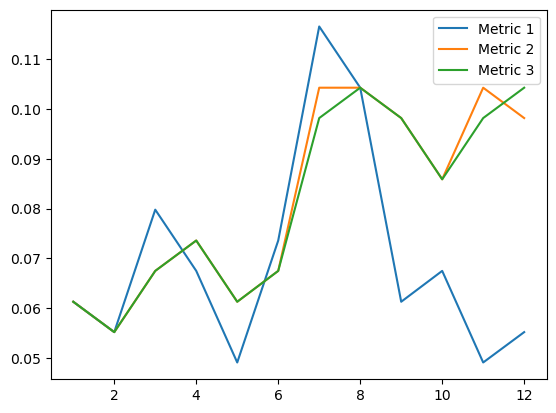

In [24]:
for metric in range(1,4):
    precision_top1_cos_vgg16 = []
    for n in range(1, 13):
        rec_cos_vgg16 = recommend_items_by_user_cos(trainset, testset, df_embeddings_vgg16, n, metric, random_items_dict=random_items_dict)
        ks = [1]
        precisions, recalls, f1_scores = evaluate_metrics(rec_cos_vgg16, testset, ks=ks)
        avg_precisions, avg_recalls, avg_f1scores = evaluate_metrics_avg(precisions, recalls, f1_scores)
        precision_top1_cos_vgg16.append(avg_precisions.get(1))
    plt.plot(range(1,13), precision_top1_cos_vgg16,label="Metric " + str(metric))

#print(precision_top1_cos_vgg16)
plt.legend()
plt.show()

In [ ]:
rec_cos_vgg16 = recommend_items_by_user_cos(trainset, testset, df_embeddings_vgg16, n=12 ,metric=3, random_items_dict=random_items_dict)

In [ ]:
ks=range(1,11)
precisions, recalls, f1_scores = evaluate_metrics(rec_cos_vgg16, testset, ks=ks)
avg_precisions, avg_recalls, avg_f1scores = evaluate_metrics_avg(precisions, recalls, f1_scores)
for k in ks:
    print(f"k={k}:  Average Precision: {avg_precisions[k]:.4f}  Average Recall: {avg_recalls[k]:.4f}  Average F1-score: {avg_f1scores[k]:.4f}")

k=1:  Average Precision: 0.1043  Average Recall: 0.0583  Average F1-score: 0.0736
k=2:  Average Precision: 0.1135  Average Recall: 0.1288  Average F1-score: 0.1178
k=3:  Average Precision: 0.1043  Average Recall: 0.1728  Average F1-score: 0.1274
k=4:  Average Precision: 0.1012  Average Recall: 0.2188  Average F1-score: 0.1359
k=5:  Average Precision: 0.0908  Average Recall: 0.2485  Average F1-score: 0.1307
k=6:  Average Precision: 0.0900  Average Recall: 0.2965  Average F1-score: 0.1359
k=7:  Average Precision: 0.0885  Average Recall: 0.3446  Average F1-score: 0.1388
k=8:  Average Precision: 0.0867  Average Recall: 0.3926  Average F1-score: 0.1399
k=9:  Average Precision: 0.0838  Average Recall: 0.4284  Average F1-score: 0.1383
k=10:  Average Precision: 0.0816  Average Recall: 0.4581  Average F1-score: 0.1368


In [ ]:
rec_eucl_vgg16 = recommend_items_by_user_eucl(trainset, testset, df_embeddings_vgg16, n=12)

TypeError: recommend_items_by_user_eucl() missing 2 required positional arguments: 'metric' and 'random_items_dict'

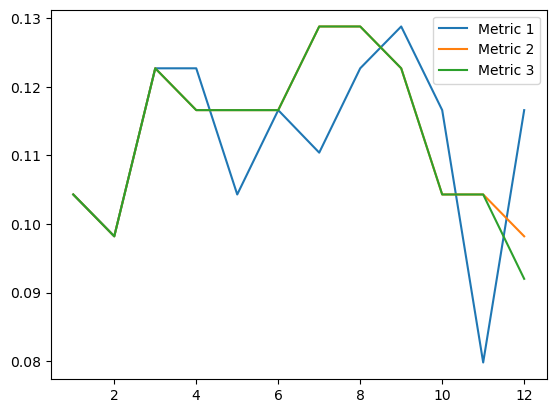

In [25]:
for metric in range(1,4):
    precision_top1_cos_vgg16 = []
    for n in range(1, 13):
        rec_cos_vgg16 = recommend_items_by_user_eucl(trainset, testset, df_embeddings_vgg16, n, metric, random_items_dict=random_items_dict)
        ks = [1]
        precisions, recalls, f1_scores = evaluate_metrics(rec_cos_vgg16, testset, ks=ks)
        avg_precisions, avg_recalls, avg_f1scores = evaluate_metrics_avg(precisions, recalls, f1_scores)
        precision_top1_cos_vgg16.append(avg_precisions.get(1))
    plt.plot(range(1,13), precision_top1_cos_vgg16,label="Metric " + str(metric))

#print(precision_top1_cos_vgg16)
plt.legend()
plt.show()

In [ ]:
ks=range(1,11)
precisions, recalls, f1_scores = evaluate_metrics(rec_eucl_vgg16, testset, ks=ks)
avg_precisions, avg_recalls, avg_f1scores = evaluate_metrics_avg(precisions, recalls, f1_scores)
for k in ks:
    print(f"k={k}:  Average Precision: {avg_precisions[k]:.4f}  Average Recall: {avg_recalls[k]:.4f}  Average F1-score: {avg_f1scores[k]:.4f}")

k=1:  Average Precision: 0.0613  Average Recall: 0.0337  Average F1-score: 0.0429
k=2:  Average Precision: 0.0583  Average Recall: 0.0644  Average F1-score: 0.0595
k=3:  Average Precision: 0.0573  Average Recall: 0.0951  Average F1-score: 0.0699
k=4:  Average Precision: 0.0598  Average Recall: 0.1288  Average F1-score: 0.0805
k=5:  Average Precision: 0.0613  Average Recall: 0.1687  Average F1-score: 0.0887
k=6:  Average Precision: 0.0675  Average Recall: 0.2249  Average F1-score: 0.1023
k=7:  Average Precision: 0.0727  Average Recall: 0.2832  Average F1-score: 0.1143
k=8:  Average Precision: 0.0744  Average Recall: 0.3405  Average F1-score: 0.1205
k=9:  Average Precision: 0.0757  Average Recall: 0.3906  Average F1-score: 0.1252
k=10:  Average Precision: 0.0773  Average Recall: 0.4376  Average F1-score: 0.1299


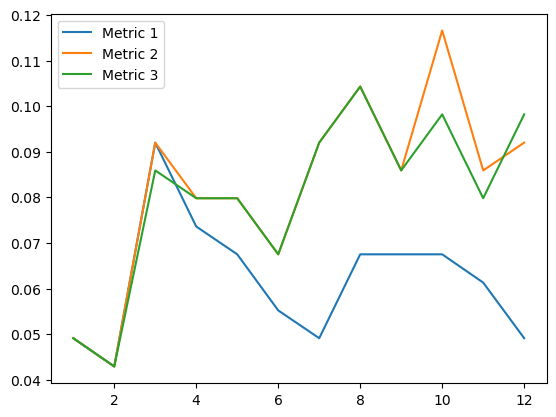

In [26]:
for metric in range(1,4):
    precision_top1_cos_vgg16 = []
    for n in range(1, 13):
        rec_cos_vgg16 = recommend_items_by_user_cos(trainset, testset, df_embeddings_vgg19, n, metric, random_items_dict=random_items_dict)
        ks = [1]
        precisions, recalls, f1_scores = evaluate_metrics(rec_cos_vgg16, testset, ks=ks)
        avg_precisions, avg_recalls, avg_f1scores = evaluate_metrics_avg(precisions, recalls, f1_scores)
        precision_top1_cos_vgg16.append(avg_precisions.get(1))
    plt.plot(range(1,13), precision_top1_cos_vgg16,label="Metric " + str(metric))

#print(precision_top1_cos_vgg16)
plt.legend()
plt.show()

In [49]:
rec_cos_vgg19 = recommend_items_by_user_cos(trainset, testset, df_embeddings_vgg19, n=10, metric=2, random_items_dict=random_items_dict)

In [50]:
ks=range(1,11)
precisions, recalls, f1_scores = evaluate_metrics(rec_cos_vgg19, testset, ks=ks)
avg_precisions, avg_recalls, avg_f1scores = evaluate_metrics_avg(precisions, recalls, f1_scores)
for k in ks:
    print(f"k={k}:  Average Precision: {avg_precisions[k]:.4f}  Average Recall: {avg_recalls[k]:.4f}  Average F1-score: {avg_f1scores[k]:.4f}")

k=1:  Average Precision: 0.1166  Average Recall: 0.0695  Average F1-score: 0.0849
k=2:  Average Precision: 0.0798  Average Recall: 0.1002  Average F1-score: 0.0863
k=3:  Average Precision: 0.0716  Average Recall: 0.1309  Average F1-score: 0.0904
k=4:  Average Precision: 0.0736  Average Recall: 0.1779  Average F1-score: 0.1018
k=5:  Average Precision: 0.0761  Average Recall: 0.2280  Average F1-score: 0.1117
k=6:  Average Precision: 0.0818  Average Recall: 0.2894  Average F1-score: 0.1251
k=7:  Average Precision: 0.0815  Average Recall: 0.3313  Average F1-score: 0.1284
k=8:  Average Precision: 0.0821  Average Recall: 0.3763  Average F1-score: 0.1326
k=9:  Average Precision: 0.0859  Average Recall: 0.4417  Average F1-score: 0.1417
k=10:  Average Precision: 0.0828  Average Recall: 0.4724  Average F1-score: 0.1391


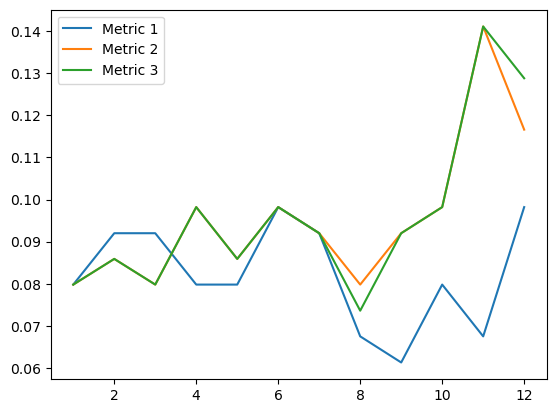

In [27]:
for metric in range(1,4):
    precision_top1_cos_vgg16 = []
    for n in range(1, 13):
        rec_cos_vgg16 = recommend_items_by_user_eucl(trainset, testset, df_embeddings_vgg19, n, metric, random_items_dict=random_items_dict)
        ks = [1]
        precisions, recalls, f1_scores = evaluate_metrics(rec_cos_vgg16, testset, ks=ks)
        avg_precisions, avg_recalls, avg_f1scores = evaluate_metrics_avg(precisions, recalls, f1_scores)
        precision_top1_cos_vgg16.append(avg_precisions.get(1))
    plt.plot(range(1,13), precision_top1_cos_vgg16,label="Metric " + str(metric))

#print(precision_top1_cos_vgg16)
plt.legend()
plt.show()

In [51]:
rec_eucl_vgg19 = recommend_items_by_user_eucl(trainset, testset, df_embeddings_vgg19, n=11, metric=3, random_items_dict=random_items_dict)

In [52]:
ks=range(1,11)
precisions, recalls, f1_scores = evaluate_metrics(rec_eucl_vgg19, testset, ks=ks)
avg_precisions, avg_recalls, avg_f1scores = evaluate_metrics_avg(precisions, recalls, f1_scores)
for k in ks:
    print(f"k={k}:  Average Precision: {avg_precisions[k]:.4f}  Average Recall: {avg_recalls[k]:.4f}  Average F1-score: {avg_f1scores[k]:.4f}")

k=1:  Average Precision: 0.1411  Average Recall: 0.0757  Average F1-score: 0.0961
k=2:  Average Precision: 0.0920  Average Recall: 0.0971  Average F1-score: 0.0918
k=3:  Average Precision: 0.0941  Average Recall: 0.1605  Average F1-score: 0.1151
k=4:  Average Precision: 0.0844  Average Recall: 0.1963  Average F1-score: 0.1148
k=5:  Average Precision: 0.0859  Average Recall: 0.2474  Average F1-score: 0.1246
k=6:  Average Precision: 0.0828  Average Recall: 0.2914  Average F1-score: 0.1261
k=7:  Average Precision: 0.0762  Average Recall: 0.3078  Average F1-score: 0.1198
k=8:  Average Precision: 0.0706  Average Recall: 0.3211  Average F1-score: 0.1136
k=9:  Average Precision: 0.0695  Average Recall: 0.3538  Average F1-score: 0.1143
k=10:  Average Precision: 0.0687  Average Recall: 0.3875  Average F1-score: 0.1149


In [ ]:
rec_cos_resnet50 = recommend_items_by_user_cos(trainset, testset, df_embeddings_resnet50_1, n=12)
ks=range(1,11)
precisions, recalls, f1_scores = evaluate_metrics(rec_cos_resnet50, testset, ks=ks)
avg_precisions, avg_recalls, avg_f1scores = evaluate_metrics_avg(precisions, recalls, f1_scores)
for k in ks:
    print(f"k={k}:  Average Precision: {avg_precisions[k]:.4f}  Average Recall: {avg_recalls[k]:.4f}  Average F1-score: {avg_f1scores[k]:.4f}")

k=1:  Average Precision: 0.0613  Average Recall: 0.0286  Average F1-score: 0.0389
k=2:  Average Precision: 0.0706  Average Recall: 0.0685  Average F1-score: 0.0693
k=3:  Average Precision: 0.0716  Average Recall: 0.1207  Average F1-score: 0.0881
k=4:  Average Precision: 0.0813  Average Recall: 0.1840  Average F1-score: 0.1108
k=5:  Average Precision: 0.0810  Average Recall: 0.2301  Average F1-score: 0.1180
k=6:  Average Precision: 0.0859  Average Recall: 0.2904  Average F1-score: 0.1308
k=7:  Average Precision: 0.0806  Average Recall: 0.3139  Average F1-score: 0.1268
k=8:  Average Precision: 0.0798  Average Recall: 0.3558  Average F1-score: 0.1288
k=9:  Average Precision: 0.0798  Average Recall: 0.4008  Average F1-score: 0.1316
k=10:  Average Precision: 0.0785  Average Recall: 0.4387  Average F1-score: 0.1318


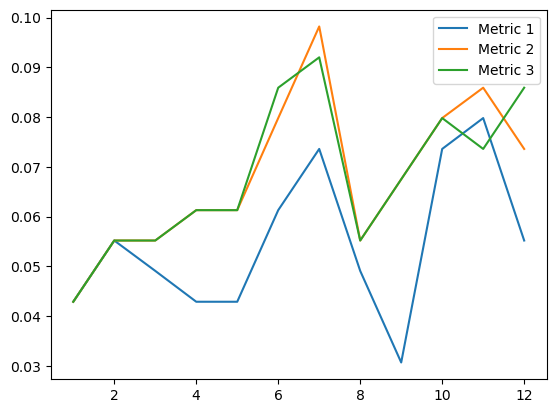

In [28]:
for metric in range(1,4):
    precision_top1_cos_vgg16 = []
    for n in range(1, 13):
        rec_cos_vgg16 = recommend_items_by_user_cos(trainset, testset, df_embeddings_resnet50_1, n, metric, random_items_dict=random_items_dict)
        ks = [1]
        precisions, recalls, f1_scores = evaluate_metrics(rec_cos_vgg16, testset, ks=ks)
        avg_precisions, avg_recalls, avg_f1scores = evaluate_metrics_avg(precisions, recalls, f1_scores)
        precision_top1_cos_vgg16.append(avg_precisions.get(1))
    plt.plot(range(1,13), precision_top1_cos_vgg16,label="Metric " + str(metric))

#print(precision_top1_cos_vgg16)
plt.legend()
plt.show()

In [ ]:
rec_eucl_resnet50 = recommend_items_by_user_eucl(trainset, testset, df_embeddings_resnet50_1, n=5)
ks=range(1,11)
precisions, recalls, f1_scores = evaluate_metrics(rec_eucl_resnet50, testset, ks=ks)
avg_precisions, avg_recalls, avg_f1scores = evaluate_metrics_avg(precisions, recalls, f1_scores)
for k in ks:
    print(f"k={k}:  Average Precision: {avg_precisions[k]:.4f}  Average Recall: {avg_recalls[k]:.4f}  Average F1-score: {avg_f1scores[k]:.4f}")

k=1:  Average Precision: 0.0675  Average Recall: 0.0317  Average F1-score: 0.0429
k=2:  Average Precision: 0.0613  Average Recall: 0.0583  Average F1-score: 0.0595
k=3:  Average Precision: 0.0695  Average Recall: 0.1063  Average F1-score: 0.0830
k=4:  Average Precision: 0.0644  Average Recall: 0.1339  Average F1-score: 0.0859
k=5:  Average Precision: 0.0712  Average Recall: 0.1963  Average F1-score: 0.1027
k=6:  Average Precision: 0.0736  Average Recall: 0.2464  Average F1-score: 0.1115
k=7:  Average Precision: 0.0719  Average Recall: 0.2751  Average F1-score: 0.1123
k=8:  Average Precision: 0.0752  Average Recall: 0.3292  Average F1-score: 0.1208
k=9:  Average Precision: 0.0784  Average Recall: 0.3763  Average F1-score: 0.1282
k=10:  Average Precision: 0.0773  Average Recall: 0.4121  Average F1-score: 0.1288


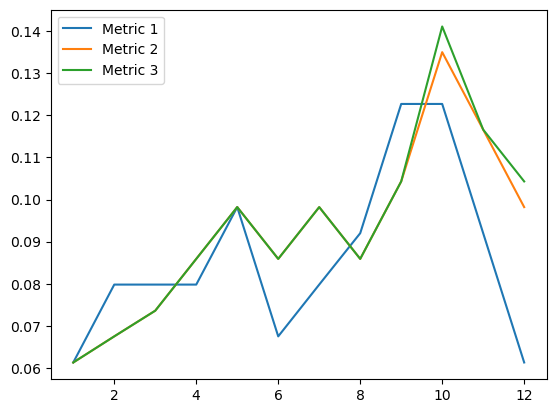

In [29]:
for metric in range(1,4):
    precision_top1_cos_vgg16 = []
    for n in range(1, 13):
        rec_cos_vgg16 = recommend_items_by_user_eucl(trainset, testset, df_embeddings_resnet50_1, n, metric, random_items_dict=random_items_dict)
        ks = [1]
        precisions, recalls, f1_scores = evaluate_metrics(rec_cos_vgg16, testset, ks=ks)
        avg_precisions, avg_recalls, avg_f1scores = evaluate_metrics_avg(precisions, recalls, f1_scores)
        precision_top1_cos_vgg16.append(avg_precisions.get(1))
    plt.plot(range(1,13), precision_top1_cos_vgg16,label="Metric " + str(metric))

#print(precision_top1_cos_vgg16)
plt.legend()
plt.show()

In [ ]:
rec_cos_resnet50v2 = recommend_items_by_user_cos(trainset, testset, df_embeddings_resnet50v2_1, n = 3)
ks=range(1,11)
precisions, recalls, f1_scores = evaluate_metrics(rec_cos_resnet50v2, testset, ks=ks)
avg_precisions, avg_recalls, avg_f1scores = evaluate_metrics_avg(precisions, recalls, f1_scores)
for k in ks:
    print(f"k={k}:  Average Precision: {avg_precisions[k]:.4f}  Average Recall: {avg_recalls[k]:.4f}  Average F1-score: {avg_f1scores[k]:.4f}")

k=1:  Average Precision: 0.0675  Average Recall: 0.0358  Average F1-score: 0.0460
k=2:  Average Precision: 0.0890  Average Recall: 0.0961  Average F1-score: 0.0908
k=3:  Average Precision: 0.0961  Average Recall: 0.1636  Average F1-score: 0.1188
k=4:  Average Precision: 0.0874  Average Recall: 0.1984  Average F1-score: 0.1191
k=5:  Average Precision: 0.0871  Average Recall: 0.2393  Average F1-score: 0.1258
k=6:  Average Precision: 0.0849  Average Recall: 0.2812  Average F1-score: 0.1285
k=7:  Average Precision: 0.0833  Average Recall: 0.3231  Average F1-score: 0.1306
k=8:  Average Precision: 0.0844  Average Recall: 0.3763  Average F1-score: 0.1360
k=9:  Average Precision: 0.0845  Average Recall: 0.4192  Average F1-score: 0.1390
k=10:  Average Precision: 0.0822  Average Recall: 0.4550  Average F1-score: 0.1377


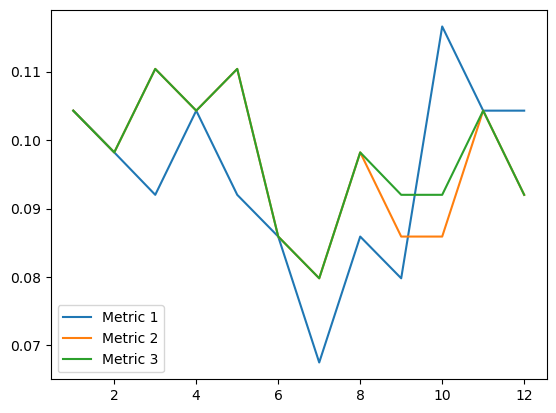

In [30]:
for metric in range(1,4):
    precision_top1_cos_vgg16 = []
    for n in range(1, 13):
        rec_cos_vgg16 = recommend_items_by_user_cos(trainset, testset, df_embeddings_resnet50v2_1, n, metric, random_items_dict=random_items_dict)
        ks = [1]
        precisions, recalls, f1_scores = evaluate_metrics(rec_cos_vgg16, testset, ks=ks)
        avg_precisions, avg_recalls, avg_f1scores = evaluate_metrics_avg(precisions, recalls, f1_scores)
        precision_top1_cos_vgg16.append(avg_precisions.get(1))
    plt.plot(range(1,13), precision_top1_cos_vgg16,label="Metric " + str(metric))

#print(precision_top1_cos_vgg16)
plt.legend()
plt.show()

In [ ]:
rec_eucl_resnet50v2 = recommend_items_by_user_eucl(trainset, testset, df_embeddings_resnet50v2_1), n=3
ks=range(1,11)
precisions, recalls, f1_scores = evaluate_metrics(rec_eucl_resnet50v2, testset, ks=ks)
avg_precisions, avg_recalls, avg_f1scores = evaluate_metrics_avg(precisions, recalls, f1_scores)
for k in ks:
    print(f"k={k}:  Average Precision: {avg_precisions[k]:.4f}  Average Recall: {avg_recalls[k]:.4f}  Average F1-score: {avg_f1scores[k]:.4f}")

k=1:  Average Precision: 0.0184  Average Recall: 0.0082  Average F1-score: 0.0112
k=2:  Average Precision: 0.0092  Average Recall: 0.0082  Average F1-score: 0.0086
k=3:  Average Precision: 0.0061  Average Recall: 0.0082  Average F1-score: 0.0070
k=4:  Average Precision: 0.0046  Average Recall: 0.0082  Average F1-score: 0.0058
k=5:  Average Precision: 0.0037  Average Recall: 0.0082  Average F1-score: 0.0050
k=6:  Average Precision: 0.0031  Average Recall: 0.0082  Average F1-score: 0.0044
k=7:  Average Precision: 0.0026  Average Recall: 0.0082  Average F1-score: 0.0040
k=8:  Average Precision: 0.0023  Average Recall: 0.0082  Average F1-score: 0.0036
k=9:  Average Precision: 0.0027  Average Recall: 0.0112  Average F1-score: 0.0044
k=10:  Average Precision: 0.0025  Average Recall: 0.0112  Average F1-score: 0.0040


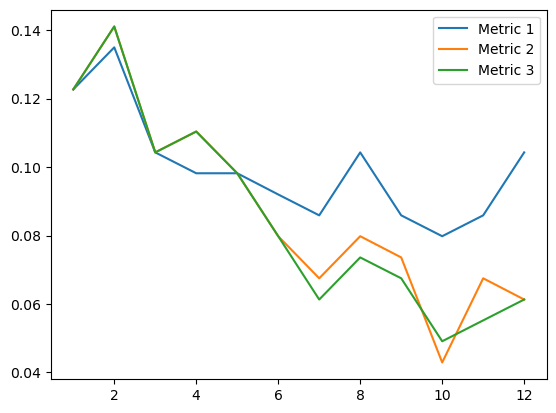

In [31]:
for metric in range(1,4):
    precision_top1_cos_vgg16 = []
    for n in range(1, 13):
        rec_cos_vgg16 = recommend_items_by_user_eucl(trainset, testset, df_embeddings_resnet50v2_1, n, metric, random_items_dict=random_items_dict)
        ks = [1]
        precisions, recalls, f1_scores = evaluate_metrics(rec_cos_vgg16, testset, ks=ks)
        avg_precisions, avg_recalls, avg_f1scores = evaluate_metrics_avg(precisions, recalls, f1_scores)
        precision_top1_cos_vgg16.append(avg_precisions.get(1))
    plt.plot(range(1,13), precision_top1_cos_vgg16,label="Metric " + str(metric))

#print(precision_top1_cos_vgg16)
plt.legend()
plt.show()

In [ ]:
rec_cos_resnet101 = recommend_items_by_user_cos(trainset, testset, df_embeddings_resnet101_1, n=3)
ks=range(1,11)
precisions, recalls, f1_scores = evaluate_metrics(rec_cos_resnet101, testset, ks=ks)
avg_precisions, avg_recalls, avg_f1scores = evaluate_metrics_avg(precisions, recalls, f1_scores)
for k in ks:
    print(f"k={k}:  Average Precision: {avg_precisions[k]:.4f}  Average Recall: {avg_recalls[k]:.4f}  Average F1-score: {avg_f1scores[k]:.4f}")

k=1:  Average Precision: 0.0123  Average Recall: 0.0051  Average F1-score: 0.0072
k=2:  Average Precision: 0.0061  Average Recall: 0.0051  Average F1-score: 0.0055
k=3:  Average Precision: 0.0061  Average Recall: 0.0082  Average F1-score: 0.0070
k=4:  Average Precision: 0.0061  Average Recall: 0.0112  Average F1-score: 0.0079
k=5:  Average Precision: 0.0061  Average Recall: 0.0143  Average F1-score: 0.0085
k=6:  Average Precision: 0.0051  Average Recall: 0.0143  Average F1-score: 0.0075
k=7:  Average Precision: 0.0044  Average Recall: 0.0143  Average F1-score: 0.0067
k=8:  Average Precision: 0.0038  Average Recall: 0.0143  Average F1-score: 0.0060
k=9:  Average Precision: 0.0041  Average Recall: 0.0204  Average F1-score: 0.0067
k=10:  Average Precision: 0.0037  Average Recall: 0.0204  Average F1-score: 0.0061


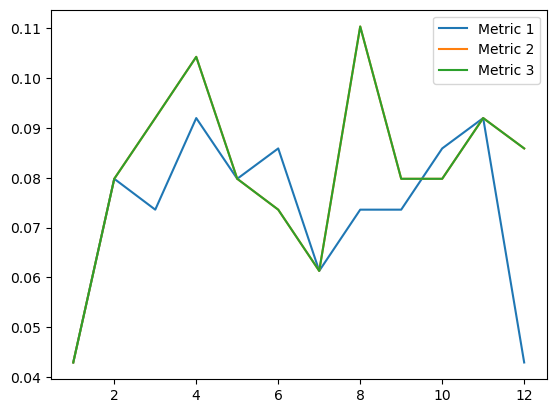

In [32]:
for metric in range(1,4):
    precision_top1_cos_vgg16 = []
    for n in range(1, 13):
        rec_cos_vgg16 = recommend_items_by_user_cos(trainset, testset, df_embeddings_resnet101_1, n, metric, random_items_dict=random_items_dict)
        ks = [1]
        precisions, recalls, f1_scores = evaluate_metrics(rec_cos_vgg16, testset, ks=ks)
        avg_precisions, avg_recalls, avg_f1scores = evaluate_metrics_avg(precisions, recalls, f1_scores)
        precision_top1_cos_vgg16.append(avg_precisions.get(1))
    plt.plot(range(1,13), precision_top1_cos_vgg16,label="Metric " + str(metric))

#print(precision_top1_cos_vgg16)
plt.legend()
plt.show()

In [ ]:
rec_eucl_resnet101 = recommend_items_by_user_eucl(trainset, testset, df_embeddings_resnet101_1)
ks=range(1,11)
precisions, recalls, f1_scores = evaluate_metrics(rec_eucl_resnet101, testset, ks=ks)
avg_precisions, avg_recalls, avg_f1scores = evaluate_metrics_avg(precisions, recalls, f1_scores)
for k in ks:
    print(f"k={k}:  Average Precision: {avg_precisions[k]:.4f}  Average Recall: {avg_recalls[k]:.4f}  Average F1-score: {avg_f1scores[k]:.4f}")

k=1:  Average Precision: 0.0184  Average Recall: 0.0082  Average F1-score: 0.0112
k=2:  Average Precision: 0.0092  Average Recall: 0.0082  Average F1-score: 0.0086
k=3:  Average Precision: 0.0061  Average Recall: 0.0082  Average F1-score: 0.0070
k=4:  Average Precision: 0.0046  Average Recall: 0.0082  Average F1-score: 0.0058
k=5:  Average Precision: 0.0037  Average Recall: 0.0082  Average F1-score: 0.0050
k=6:  Average Precision: 0.0031  Average Recall: 0.0082  Average F1-score: 0.0044
k=7:  Average Precision: 0.0026  Average Recall: 0.0082  Average F1-score: 0.0040
k=8:  Average Precision: 0.0023  Average Recall: 0.0082  Average F1-score: 0.0036
k=9:  Average Precision: 0.0027  Average Recall: 0.0112  Average F1-score: 0.0044
k=10:  Average Precision: 0.0025  Average Recall: 0.0112  Average F1-score: 0.0040


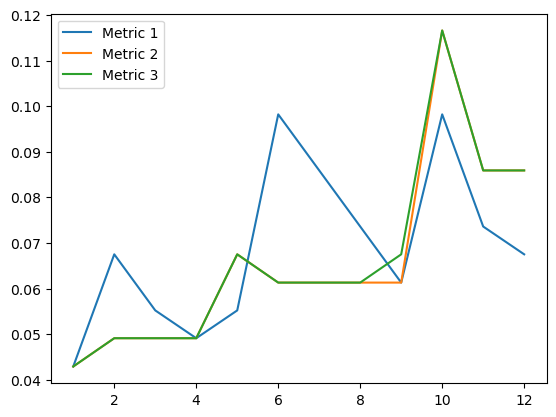

In [33]:
for metric in range(1,4):
    precision_top1_cos_vgg16 = []
    for n in range(1, 13):
        rec_cos_vgg16 = recommend_items_by_user_eucl(trainset, testset, df_embeddings_resnet101_1, n, metric, random_items_dict=random_items_dict)
        ks = [1]
        precisions, recalls, f1_scores = evaluate_metrics(rec_cos_vgg16, testset, ks=ks)
        avg_precisions, avg_recalls, avg_f1scores = evaluate_metrics_avg(precisions, recalls, f1_scores)
        precision_top1_cos_vgg16.append(avg_precisions.get(1))
    plt.plot(range(1,13), precision_top1_cos_vgg16,label="Metric " + str(metric))

#print(precision_top1_cos_vgg16)
plt.legend()
plt.show()

In [ ]:
rec_cos_resnet101v2 = recommend_items_by_user_cos(trainset, testset, df_embeddings_resnet101v2_1)
ks=range(1,11)
precisions, recalls, f1_scores = evaluate_metrics(rec_cos_resnet101v2, testset, ks=ks)
avg_precisions, avg_recalls, avg_f1scores = evaluate_metrics_avg(precisions, recalls, f1_scores)
for k in ks:
    print(f"k={k}:  Average Precision: {avg_precisions[k]:.4f}  Average Recall: {avg_recalls[k]:.4f}  Average F1-score: {avg_f1scores[k]:.4f}")

k=1:  Average Precision: 0.0123  Average Recall: 0.0051  Average F1-score: 0.0072
k=2:  Average Precision: 0.0061  Average Recall: 0.0051  Average F1-score: 0.0055
k=3:  Average Precision: 0.0061  Average Recall: 0.0082  Average F1-score: 0.0070
k=4:  Average Precision: 0.0061  Average Recall: 0.0112  Average F1-score: 0.0079
k=5:  Average Precision: 0.0061  Average Recall: 0.0143  Average F1-score: 0.0085
k=6:  Average Precision: 0.0051  Average Recall: 0.0143  Average F1-score: 0.0075
k=7:  Average Precision: 0.0044  Average Recall: 0.0143  Average F1-score: 0.0067
k=8:  Average Precision: 0.0038  Average Recall: 0.0143  Average F1-score: 0.0060
k=9:  Average Precision: 0.0041  Average Recall: 0.0204  Average F1-score: 0.0067
k=10:  Average Precision: 0.0037  Average Recall: 0.0204  Average F1-score: 0.0061


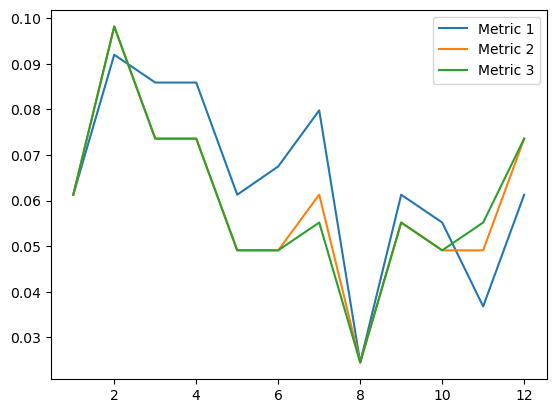

In [34]:
for metric in range(1,4):
    precision_top1_cos_vgg16 = []
    for n in range(1, 13):
        rec_cos_vgg16 = recommend_items_by_user_cos(trainset, testset, df_embeddings_resnet101v2_1, n, metric, random_items_dict=random_items_dict)
        ks = [1]
        precisions, recalls, f1_scores = evaluate_metrics(rec_cos_vgg16, testset, ks=ks)
        avg_precisions, avg_recalls, avg_f1scores = evaluate_metrics_avg(precisions, recalls, f1_scores)
        precision_top1_cos_vgg16.append(avg_precisions.get(1))
    plt.plot(range(1,13), precision_top1_cos_vgg16,label="Metric " + str(metric))

#print(precision_top1_cos_vgg16)
plt.legend()
plt.show()

In [ ]:
rec_eucl_resnet101v2 = recommend_items_by_user_eucl(trainset, testset, df_embeddings_resnet101v2_1)
ks=range(1,11)
precisions, recalls, f1_scores = evaluate_metrics(rec_eucl_resnet101v2, testset, ks=ks)
avg_precisions, avg_recalls, avg_f1scores = evaluate_metrics_avg(precisions, recalls, f1_scores)
for k in ks:
    print(f"k={k}:  Average Precision: {avg_precisions[k]:.4f}  Average Recall: {avg_recalls[k]:.4f}  Average F1-score: {avg_f1scores[k]:.4f}")

k=1:  Average Precision: 0.0184  Average Recall: 0.0082  Average F1-score: 0.0112
k=2:  Average Precision: 0.0092  Average Recall: 0.0082  Average F1-score: 0.0086
k=3:  Average Precision: 0.0061  Average Recall: 0.0082  Average F1-score: 0.0070
k=4:  Average Precision: 0.0046  Average Recall: 0.0082  Average F1-score: 0.0058
k=5:  Average Precision: 0.0037  Average Recall: 0.0082  Average F1-score: 0.0050
k=6:  Average Precision: 0.0031  Average Recall: 0.0082  Average F1-score: 0.0044
k=7:  Average Precision: 0.0026  Average Recall: 0.0082  Average F1-score: 0.0040
k=8:  Average Precision: 0.0023  Average Recall: 0.0082  Average F1-score: 0.0036
k=9:  Average Precision: 0.0027  Average Recall: 0.0112  Average F1-score: 0.0044
k=10:  Average Precision: 0.0025  Average Recall: 0.0112  Average F1-score: 0.0040


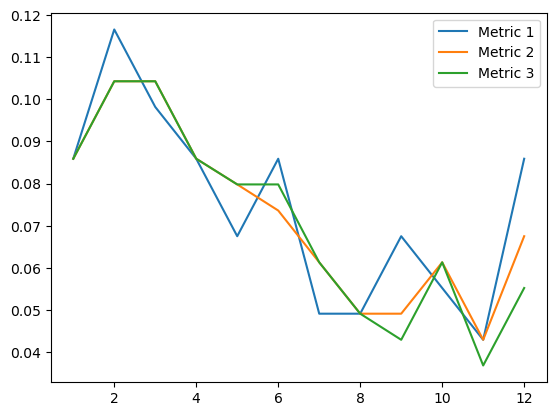

In [35]:
for metric in range(1,4):
    precision_top1_cos_vgg16 = []
    for n in range(1, 13):
        rec_cos_vgg16 = recommend_items_by_user_eucl(trainset, testset, df_embeddings_resnet101v2_1, n, metric, random_items_dict=random_items_dict)
        ks = [1]
        precisions, recalls, f1_scores = evaluate_metrics(rec_cos_vgg16, testset, ks=ks)
        avg_precisions, avg_recalls, avg_f1scores = evaluate_metrics_avg(precisions, recalls, f1_scores)
        precision_top1_cos_vgg16.append(avg_precisions.get(1))
    plt.plot(range(1,13), precision_top1_cos_vgg16,label="Metric " + str(metric))

#print(precision_top1_cos_vgg16)
plt.legend()
plt.show()

In [ ]:
rec_cos_resnet152 = recommend_items_by_user_cos(trainset, testset, df_embeddings_resnet152_1)
ks=range(1,11)
precisions, recalls, f1_scores = evaluate_metrics(rec_cos_resnet152, testset, ks=ks)
avg_precisions, avg_recalls, avg_f1scores = evaluate_metrics_avg(precisions, recalls, f1_scores)
for k in ks:
    print(f"k={k}:  Average Precision: {avg_precisions[k]:.4f}  Average Recall: {avg_recalls[k]:.4f}  Average F1-score: {avg_f1scores[k]:.4f}")

k=1:  Average Precision: 0.0123  Average Recall: 0.0051  Average F1-score: 0.0072
k=2:  Average Precision: 0.0061  Average Recall: 0.0051  Average F1-score: 0.0055
k=3:  Average Precision: 0.0061  Average Recall: 0.0082  Average F1-score: 0.0070
k=4:  Average Precision: 0.0061  Average Recall: 0.0112  Average F1-score: 0.0079
k=5:  Average Precision: 0.0061  Average Recall: 0.0143  Average F1-score: 0.0085
k=6:  Average Precision: 0.0051  Average Recall: 0.0143  Average F1-score: 0.0075
k=7:  Average Precision: 0.0044  Average Recall: 0.0143  Average F1-score: 0.0067
k=8:  Average Precision: 0.0038  Average Recall: 0.0143  Average F1-score: 0.0060
k=9:  Average Precision: 0.0041  Average Recall: 0.0204  Average F1-score: 0.0067
k=10:  Average Precision: 0.0037  Average Recall: 0.0204  Average F1-score: 0.0061


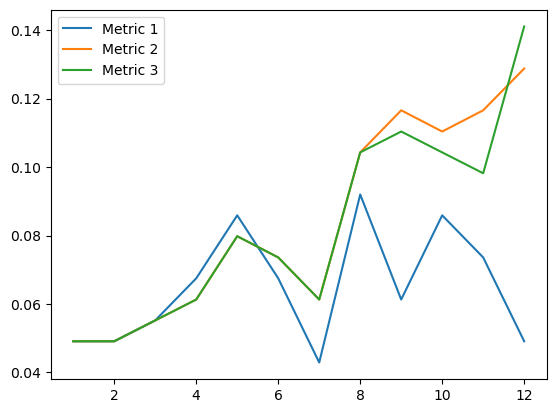

In [36]:
for metric in range(1,4):
    precision_top1_cos_vgg16 = []
    for n in range(1, 13):
        rec_cos_vgg16 = recommend_items_by_user_cos(trainset, testset, df_embeddings_resnet152_1, n, metric, random_items_dict=random_items_dict)
        ks = [1]
        precisions, recalls, f1_scores = evaluate_metrics(rec_cos_vgg16, testset, ks=ks)
        avg_precisions, avg_recalls, avg_f1scores = evaluate_metrics_avg(precisions, recalls, f1_scores)
        precision_top1_cos_vgg16.append(avg_precisions.get(1))
    plt.plot(range(1,13), precision_top1_cos_vgg16,label="Metric " + str(metric))

#print(precision_top1_cos_vgg16)
plt.legend()
plt.show()

In [ ]:
rec_eucl_resnet152 = recommend_items_by_user_eucl(trainset, testset, df_embeddings_resnet152_1)
ks=range(1,11)
precisions, recalls, f1_scores = evaluate_metrics(rec_eucl_resnet152, testset, ks=ks)
avg_precisions, avg_recalls, avg_f1scores = evaluate_metrics_avg(precisions, recalls, f1_scores)
for k in ks:
    print(f"k={k}:  Average Precision: {avg_precisions[k]:.4f}  Average Recall: {avg_recalls[k]:.4f}  Average F1-score: {avg_f1scores[k]:.4f}")

k=1:  Average Precision: 0.0184  Average Recall: 0.0082  Average F1-score: 0.0112
k=2:  Average Precision: 0.0092  Average Recall: 0.0082  Average F1-score: 0.0086
k=3:  Average Precision: 0.0061  Average Recall: 0.0082  Average F1-score: 0.0070
k=4:  Average Precision: 0.0046  Average Recall: 0.0082  Average F1-score: 0.0058
k=5:  Average Precision: 0.0037  Average Recall: 0.0082  Average F1-score: 0.0050
k=6:  Average Precision: 0.0031  Average Recall: 0.0082  Average F1-score: 0.0044
k=7:  Average Precision: 0.0026  Average Recall: 0.0082  Average F1-score: 0.0040
k=8:  Average Precision: 0.0023  Average Recall: 0.0082  Average F1-score: 0.0036
k=9:  Average Precision: 0.0027  Average Recall: 0.0112  Average F1-score: 0.0044
k=10:  Average Precision: 0.0025  Average Recall: 0.0112  Average F1-score: 0.0040


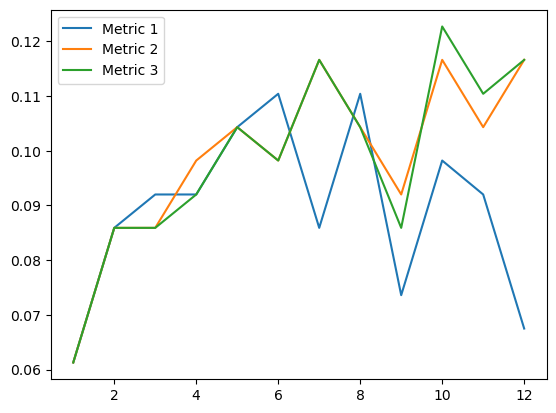

In [37]:
for metric in range(1,4):
    precision_top1_cos_vgg16 = []
    for n in range(1, 13):
        rec_cos_vgg16 = recommend_items_by_user_eucl(trainset, testset, df_embeddings_resnet152_1, n, metric, random_items_dict=random_items_dict)
        ks = [1]
        precisions, recalls, f1_scores = evaluate_metrics(rec_cos_vgg16, testset, ks=ks)
        avg_precisions, avg_recalls, avg_f1scores = evaluate_metrics_avg(precisions, recalls, f1_scores)
        precision_top1_cos_vgg16.append(avg_precisions.get(1))
    plt.plot(range(1,13), precision_top1_cos_vgg16,label="Metric " + str(metric))

#print(precision_top1_cos_vgg16)
plt.legend()
plt.show()

In [ ]:
rec_cos_resnet152v2 = recommend_items_by_user_cos(trainset, testset, df_embeddings_resnet152v2_1)
ks=range(1,11)
precisions, recalls, f1_scores = evaluate_metrics(rec_cos_resnet152v2, testset, ks=ks)
avg_precisions, avg_recalls, avg_f1scores = evaluate_metrics_avg(precisions, recalls, f1_scores)
for k in ks:
    print(f"k={k}:  Average Precision: {avg_precisions[k]:.4f}  Average Recall: {avg_recalls[k]:.4f}  Average F1-score: {avg_f1scores[k]:.4f}")

k=1:  Average Precision: 0.0123  Average Recall: 0.0051  Average F1-score: 0.0072
k=2:  Average Precision: 0.0061  Average Recall: 0.0051  Average F1-score: 0.0055
k=3:  Average Precision: 0.0061  Average Recall: 0.0082  Average F1-score: 0.0070
k=4:  Average Precision: 0.0061  Average Recall: 0.0112  Average F1-score: 0.0079
k=5:  Average Precision: 0.0061  Average Recall: 0.0143  Average F1-score: 0.0085
k=6:  Average Precision: 0.0051  Average Recall: 0.0143  Average F1-score: 0.0075
k=7:  Average Precision: 0.0044  Average Recall: 0.0143  Average F1-score: 0.0067
k=8:  Average Precision: 0.0038  Average Recall: 0.0143  Average F1-score: 0.0060
k=9:  Average Precision: 0.0041  Average Recall: 0.0204  Average F1-score: 0.0067
k=10:  Average Precision: 0.0037  Average Recall: 0.0204  Average F1-score: 0.0061


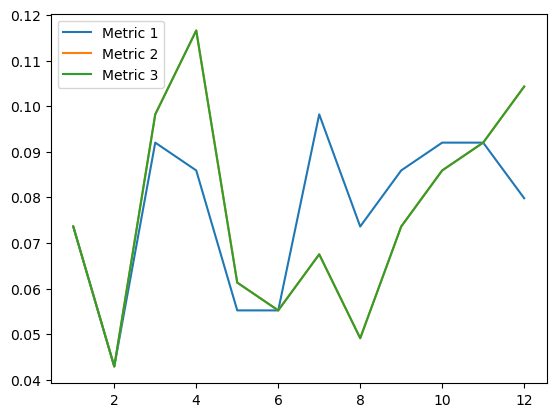

In [38]:
for metric in range(1,4):
    precision_top1_cos_vgg16 = []
    for n in range(1, 13):
        rec_cos_vgg16 = recommend_items_by_user_cos(trainset, testset, df_embeddings_resnet152v2_1, n, metric, random_items_dict=random_items_dict)
        ks = [1]
        precisions, recalls, f1_scores = evaluate_metrics(rec_cos_vgg16, testset, ks=ks)
        avg_precisions, avg_recalls, avg_f1scores = evaluate_metrics_avg(precisions, recalls, f1_scores)
        precision_top1_cos_vgg16.append(avg_precisions.get(1))
    plt.plot(range(1,13), precision_top1_cos_vgg16,label="Metric " + str(metric))

#print(precision_top1_cos_vgg16)
plt.legend()
plt.show()

In [ ]:
rec_eucl_resnet152v2 = recommend_items_by_user_eucl(trainset, testset, df_embeddings_resnet152v2_1)
ks=range(1,11)
precisions, recalls, f1_scores = evaluate_metrics(rec_eucl_resnet152v2, testset, ks=ks)
avg_precisions, avg_recalls, avg_f1scores = evaluate_metrics_avg(precisions, recalls, f1_scores)
for k in ks:
    print(f"k={k}:  Average Precision: {avg_precisions[k]:.4f}  Average Recall: {avg_recalls[k]:.4f}  Average F1-score: {avg_f1scores[k]:.4f}")

k=1:  Average Precision: 0.0184  Average Recall: 0.0082  Average F1-score: 0.0112
k=2:  Average Precision: 0.0092  Average Recall: 0.0082  Average F1-score: 0.0086
k=3:  Average Precision: 0.0061  Average Recall: 0.0082  Average F1-score: 0.0070
k=4:  Average Precision: 0.0046  Average Recall: 0.0082  Average F1-score: 0.0058
k=5:  Average Precision: 0.0037  Average Recall: 0.0082  Average F1-score: 0.0050
k=6:  Average Precision: 0.0031  Average Recall: 0.0082  Average F1-score: 0.0044
k=7:  Average Precision: 0.0026  Average Recall: 0.0082  Average F1-score: 0.0040
k=8:  Average Precision: 0.0023  Average Recall: 0.0082  Average F1-score: 0.0036
k=9:  Average Precision: 0.0027  Average Recall: 0.0112  Average F1-score: 0.0044
k=10:  Average Precision: 0.0025  Average Recall: 0.0112  Average F1-score: 0.0040


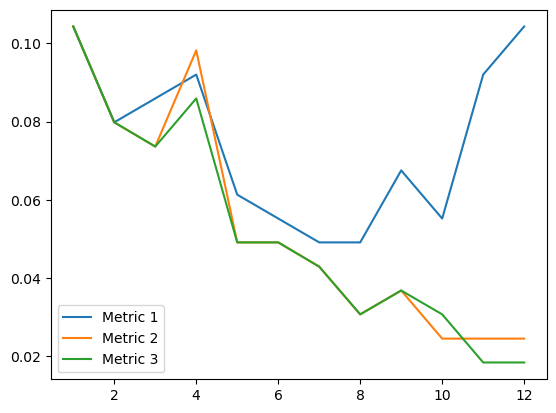

In [39]:
for metric in range(1,4):
    precision_top1_cos_vgg16 = []
    for n in range(1, 13):
        rec_cos_vgg16 = recommend_items_by_user_eucl(trainset, testset, df_embeddings_resnet152v2_1, n, metric, random_items_dict=random_items_dict)
        ks = [1]
        precisions, recalls, f1_scores = evaluate_metrics(rec_cos_vgg16, testset, ks=ks)
        avg_precisions, avg_recalls, avg_f1scores = evaluate_metrics_avg(precisions, recalls, f1_scores)
        precision_top1_cos_vgg16.append(avg_precisions.get(1))
    plt.plot(range(1,13), precision_top1_cos_vgg16,label="Metric " + str(metric))

#print(precision_top1_cos_vgg16)
plt.legend()
plt.show()

In [ ]:
rec_cos_inceptionv3 = recommend_items_by_user_cos(trainset, testset, df_embeddings_inceptionv3_1)
ks=range(1,11)
precisions, recalls, f1_scores = evaluate_metrics(rec_cos_inceptionv3, testset, ks=ks)
avg_precisions, avg_recalls, avg_f1scores = evaluate_metrics_avg(precisions, recalls, f1_scores)
for k in ks:
    print(f"k={k}:  Average Precision: {avg_precisions[k]:.4f}  Average Recall: {avg_recalls[k]:.4f}  Average F1-score: {avg_f1scores[k]:.4f}")

k=1:  Average Precision: 0.0123  Average Recall: 0.0051  Average F1-score: 0.0072
k=2:  Average Precision: 0.0061  Average Recall: 0.0051  Average F1-score: 0.0055
k=3:  Average Precision: 0.0061  Average Recall: 0.0082  Average F1-score: 0.0070
k=4:  Average Precision: 0.0061  Average Recall: 0.0112  Average F1-score: 0.0079
k=5:  Average Precision: 0.0061  Average Recall: 0.0143  Average F1-score: 0.0085
k=6:  Average Precision: 0.0051  Average Recall: 0.0143  Average F1-score: 0.0075
k=7:  Average Precision: 0.0044  Average Recall: 0.0143  Average F1-score: 0.0067
k=8:  Average Precision: 0.0038  Average Recall: 0.0143  Average F1-score: 0.0060
k=9:  Average Precision: 0.0041  Average Recall: 0.0204  Average F1-score: 0.0067
k=10:  Average Precision: 0.0037  Average Recall: 0.0204  Average F1-score: 0.0061


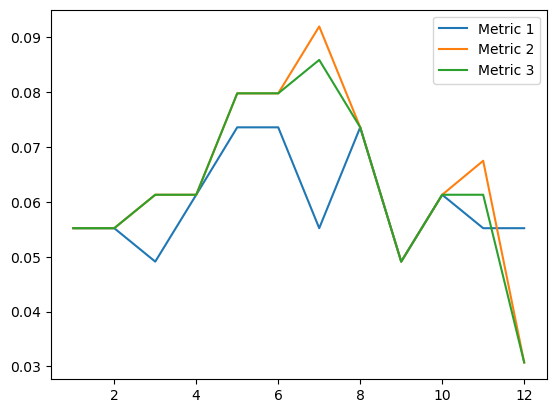

In [40]:
for metric in range(1,4):
    precision_top1_cos_vgg16 = []
    for n in range(1, 13):
        rec_cos_vgg16 = recommend_items_by_user_cos(trainset, testset, df_embeddings_inceptionv3_1, n, metric, random_items_dict=random_items_dict)
        ks = [1]
        precisions, recalls, f1_scores = evaluate_metrics(rec_cos_vgg16, testset, ks=ks)
        avg_precisions, avg_recalls, avg_f1scores = evaluate_metrics_avg(precisions, recalls, f1_scores)
        precision_top1_cos_vgg16.append(avg_precisions.get(1))
    plt.plot(range(1,13), precision_top1_cos_vgg16,label="Metric " + str(metric))

#print(precision_top1_cos_vgg16)
plt.legend()
plt.show()

In [41]:
rec_eucl_inceptionv3 = recommend_items_by_user_eucl(trainset, testset, df_embeddings_inceptionv3_1)
ks=range(1,11)
precisions, recalls, f1_scores = evaluate_metrics(rec_eucl_inceptionv3, testset, ks=ks)
avg_precisions, avg_recalls, avg_f1scores = evaluate_metrics_avg(precisions, recalls, f1_scores)
for k in ks:
    print(f"k={k}:  Average Precision: {avg_precisions[k]:.4f}  Average Recall: {avg_recalls[k]:.4f}  Average F1-score: {avg_f1scores[k]:.4f}")

TypeError: recommend_items_by_user_eucl() missing 3 required positional arguments: 'n', 'metric', and 'random_items_dict'

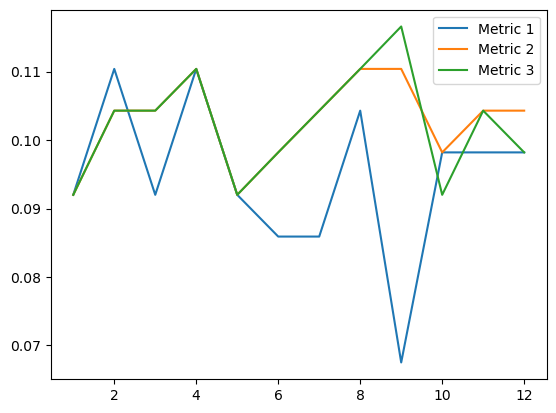

In [42]:
for metric in range(1,4):
    precision_top1_cos_vgg16 = []
    for n in range(1, 13):
        rec_cos_vgg16 = recommend_items_by_user_eucl(trainset, testset, df_embeddings_inceptionv3_1, n, metric, random_items_dict=random_items_dict)
        ks = [1]
        precisions, recalls, f1_scores = evaluate_metrics(rec_cos_vgg16, testset, ks=ks)
        avg_precisions, avg_recalls, avg_f1scores = evaluate_metrics_avg(precisions, recalls, f1_scores)
        precision_top1_cos_vgg16.append(avg_precisions.get(1))
    plt.plot(range(1,13), precision_top1_cos_vgg16,label="Metric " + str(metric))

#print(precision_top1_cos_vgg16)
plt.legend()
plt.show()

In [ ]:
rec_cos_xception = recommend_items_by_user_cos(trainset, testset, df_embeddings_xception_1)
ks=range(1,11)
precisions, recalls, f1_scores = evaluate_metrics(rec_cos_xception, testset, ks=ks)
avg_precisions, avg_recalls, avg_f1scores = evaluate_metrics_avg(precisions, recalls, f1_scores)
for k in ks:
    print(f"k={k}:  Average Precision: {avg_precisions[k]:.4f}  Average Recall: {avg_recalls[k]:.4f}  Average F1-score: {avg_f1scores[k]:.4f}")

k=1:  Average Precision: 0.0123  Average Recall: 0.0051  Average F1-score: 0.0072
k=2:  Average Precision: 0.0061  Average Recall: 0.0051  Average F1-score: 0.0055
k=3:  Average Precision: 0.0061  Average Recall: 0.0082  Average F1-score: 0.0070
k=4:  Average Precision: 0.0061  Average Recall: 0.0112  Average F1-score: 0.0079
k=5:  Average Precision: 0.0061  Average Recall: 0.0143  Average F1-score: 0.0085
k=6:  Average Precision: 0.0051  Average Recall: 0.0143  Average F1-score: 0.0075
k=7:  Average Precision: 0.0044  Average Recall: 0.0143  Average F1-score: 0.0067
k=8:  Average Precision: 0.0038  Average Recall: 0.0143  Average F1-score: 0.0060
k=9:  Average Precision: 0.0041  Average Recall: 0.0204  Average F1-score: 0.0067
k=10:  Average Precision: 0.0037  Average Recall: 0.0204  Average F1-score: 0.0061


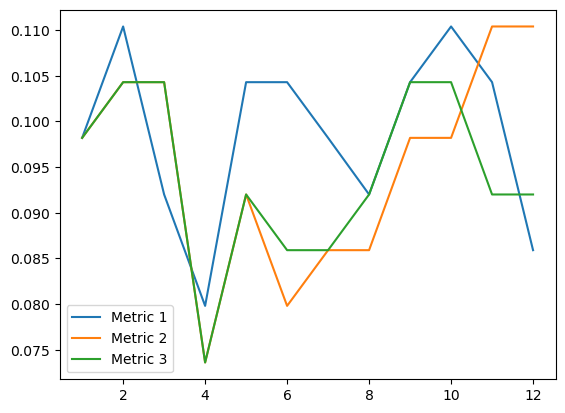

In [43]:
for metric in range(1,4):
    precision_top1_cos_vgg16 = []
    for n in range(1, 13):
        rec_cos_vgg16 = recommend_items_by_user_cos(trainset, testset, df_embeddings_xception_1, n, metric, random_items_dict=random_items_dict)
        ks = [1]
        precisions, recalls, f1_scores = evaluate_metrics(rec_cos_vgg16, testset, ks=ks)
        avg_precisions, avg_recalls, avg_f1scores = evaluate_metrics_avg(precisions, recalls, f1_scores)
        precision_top1_cos_vgg16.append(avg_precisions.get(1))
    plt.plot(range(1,13), precision_top1_cos_vgg16,label="Metric " + str(metric))

#print(precision_top1_cos_vgg16)
plt.legend()
plt.show()

In [ ]:
rec_eucl_xception = recommend_items_by_user_eucl(trainset, testset, df_embeddings_xception_1)
ks=range(1,11)
precisions, recalls, f1_scores = evaluate_metrics(rec_eucl_xception, testset, ks=ks)
avg_precisions, avg_recalls, avg_f1scores = evaluate_metrics_avg(precisions, recalls, f1_scores)
for k in ks:
    print(f"k={k}:  Average Precision: {avg_precisions[k]:.4f}  Average Recall: {avg_recalls[k]:.4f}  Average F1-score: {avg_f1scores[k]:.4f}")

k=1:  Average Precision: 0.0184  Average Recall: 0.0082  Average F1-score: 0.0112
k=2:  Average Precision: 0.0092  Average Recall: 0.0082  Average F1-score: 0.0086
k=3:  Average Precision: 0.0061  Average Recall: 0.0082  Average F1-score: 0.0070
k=4:  Average Precision: 0.0046  Average Recall: 0.0082  Average F1-score: 0.0058
k=5:  Average Precision: 0.0037  Average Recall: 0.0082  Average F1-score: 0.0050
k=6:  Average Precision: 0.0031  Average Recall: 0.0082  Average F1-score: 0.0044
k=7:  Average Precision: 0.0026  Average Recall: 0.0082  Average F1-score: 0.0040
k=8:  Average Precision: 0.0023  Average Recall: 0.0082  Average F1-score: 0.0036
k=9:  Average Precision: 0.0027  Average Recall: 0.0112  Average F1-score: 0.0044
k=10:  Average Precision: 0.0025  Average Recall: 0.0112  Average F1-score: 0.0040


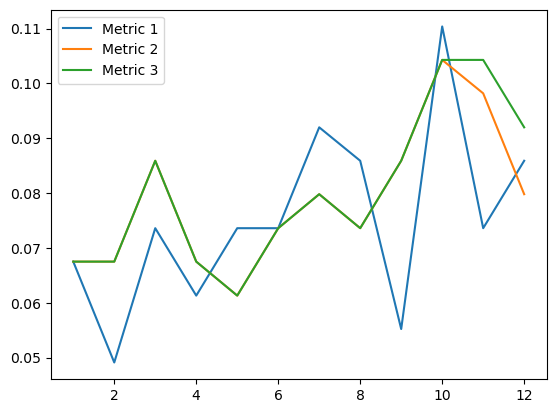

In [44]:
for metric in range(1,4):
    precision_top1_cos_vgg16 = []
    for n in range(1, 13):
        rec_cos_vgg16 = recommend_items_by_user_eucl(trainset, testset, df_embeddings_xception_1, n, metric, random_items_dict=random_items_dict)
        ks = [1]
        precisions, recalls, f1_scores = evaluate_metrics(rec_cos_vgg16, testset, ks=ks)
        avg_precisions, avg_recalls, avg_f1scores = evaluate_metrics_avg(precisions, recalls, f1_scores)
        precision_top1_cos_vgg16.append(avg_precisions.get(1))
    plt.plot(range(1,13), precision_top1_cos_vgg16,label="Metric " + str(metric))

#print(precision_top1_cos_vgg16)
plt.legend()
plt.show()

In [46]:
from random import sample

def recommend_items_random(trainset, testset, random_items_dict):
    train_df = pd.DataFrame(trainset, columns=['uid', 'iid', 'rating'])
    test_df = pd.DataFrame(testset, columns=['uid', 'iid', 'rating'])

    items_all_ids = set(train_df['iid'].to_list() + test_df['iid'].to_list())

    recommendations = {}

    for user in test_df['uid'].unique():

        user_train = train_df[train_df['uid'] == user]
        user_test = test_df[test_df['uid'] == user]

        train_item_ids = user_train['iid'].to_list()
        test_item_ids = user_test['iid'].to_list()

        items_to_recommend = []

        random_items = random_items_dict[user]

        items_to_recommend = random_items + test_item_ids
        a = sample(items_to_recommend,10)
        recommendations[user] = a

    return recommendations

In [ ]:
a = recommend_items_random(trainset, testset, random_items_dict)

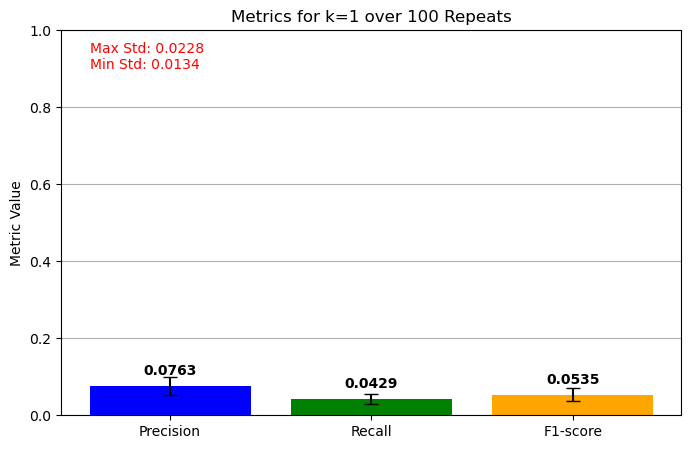

In [47]:
import numpy as np
import matplotlib.pyplot as plt

# Configurações
num_repeats = 100

# Armazenar resultados para k = 1
precisions_k1 = []
recalls_k1 = []
f1scores_k1 = []

for _ in range(num_repeats):
    # Gerar recomendações aleatórias
    a = recommend_items_random(trainset, testset, random_items_dict)
    
    # Avaliar métricas
    precisions, recalls, f1_scores = evaluate_metrics(a, testset, ks=[1])
    avg_precisions, avg_recalls, avg_f1scores = evaluate_metrics_avg(precisions, recalls, f1_scores)
    
    # Armazenar os valores médios para k = 1
    precisions_k1.append(avg_precisions[1])
    recalls_k1.append(avg_recalls[1])
    f1scores_k1.append(avg_f1scores[1])

# Calcular médias e desvios padrão
mean_precision_k1 = np.mean(precisions_k1)
mean_recall_k1 = np.mean(recalls_k1)
mean_f1score_k1 = np.mean(f1scores_k1)

std_precision_k1 = np.std(precisions_k1)
std_recall_k1 = np.std(recalls_k1)
std_f1score_k1 = np.std(f1scores_k1)

# Desvios padrão calculados
stds = [std_precision_k1, std_recall_k1, std_f1score_k1]
min_std = min(stds)
max_std = max(stds)

# Plotar os resultados
metrics = ["Precision", "Recall", "F1-score"]
means = [mean_precision_k1, mean_recall_k1, mean_f1score_k1]

plt.figure(figsize=(8, 5))
bars = plt.bar(metrics, means, yerr=stds, capsize=5, color=['blue', 'green', 'orange'])

# Adicionar os valores médios no topo de cada barra
for bar, mean in zip(bars, means):
    plt.text(
        bar.get_x() + bar.get_width() / 2,  # Posição horizontal
        bar.get_height() + 0.02,  # Posição vertical um pouco acima da barra
        f"{mean:.4f}",  # Valor médio com 4 casas decimais
        ha='center', va='bottom', fontsize=10, fontweight='bold'
    )

# Mostrar informações sobre o desvio padrão no gráfico
plt.text(-0.4, 0.9, f"Max Std: {max_std:.4f}\nMin Std: {min_std:.4f}", fontsize=10, color="red")

# Configurações do gráfico
plt.ylabel("Metric Value")
plt.title("Metrics for k=1 over 100 Repeats")
plt.ylim(0, 1)  # As métricas normalmente estão entre 0 e 1
plt.grid(axis="y")
plt.show()

In [48]:
a = recommend_items_random(trainset, testset, random_items_dict)
ks=range(1,11)
precisions, recalls, f1_scores = evaluate_metrics(a, testset, ks=ks)
avg_precisions, avg_recalls, avg_f1scores = evaluate_metrics_avg(precisions, recalls, f1_scores)
for k in ks:
    print(f"k={k}:  Average Precision: {avg_precisions[k]:.4f}  Average Recall: {avg_recalls[k]:.4f}  Average F1-score: {avg_f1scores[k]:.4f}")

k=1:  Average Precision: 0.0859  Average Recall: 0.0501  Average F1-score: 0.0613
k=2:  Average Precision: 0.0583  Average Recall: 0.0654  Average F1-score: 0.0601
k=3:  Average Precision: 0.0532  Average Recall: 0.0920  Average F1-score: 0.0656
k=4:  Average Precision: 0.0598  Average Recall: 0.1524  Average F1-score: 0.0835
k=5:  Average Precision: 0.0613  Average Recall: 0.1912  Average F1-score: 0.0906
k=6:  Average Precision: 0.0665  Average Recall: 0.2382  Average F1-score: 0.1018
k=7:  Average Precision: 0.0710  Average Recall: 0.2945  Average F1-score: 0.1123
k=8:  Average Precision: 0.0767  Average Recall: 0.3558  Average F1-score: 0.1241
k=9:  Average Precision: 0.0757  Average Recall: 0.4008  Average F1-score: 0.1253
k=10:  Average Precision: 0.0767  Average Recall: 0.4519  Average F1-score: 0.1292
